# World Data League 2022

## 🎯 Challenge
*Predicting a safety score for women in Costa Rica*


## Team: Data Crocodiles
## 👥 Authors
* Diogo Pessoa
* Fábio Lopes
* Francisco Valente
* Júlio Medeiros

## 💻 Development

### Requirements

Installing packages required to develop the project

In [1]:
%pip install matplotlib==3.4.3
%pip install shap
%pip install holidays
%pip install suntime
%pip install osmnx
%pip install shapely
%pip install folium
%pip install unidecode
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import Packages

Importing packages required to develop the project

In [2]:
import os
import io
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import requests
import datetime
import zipfile
from suntime import Sun
import holidays
from pmdarima.arima import auto_arima
from unidecode import unidecode
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
import osmnx as ox
import geopandas as gpd
import geopandas
from shapely.geometry import Point, Polygon
from shapely.ops import transform
import folium
from itertools import chain
from folium.plugins import TimeSliderChoropleth
import branca.colormap as cm

/Users/fabiolopes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/fabiolopes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Custom Functions

Functions developed by us to perform our analysis

In [3]:
def relative_rmse(y_true,y_pred):
    '''
    Compute relative root mean squared error

    Input:
        y_true: Expected values
        y_pred: Predicted values
    Output:
        rrmse: Relative root mean squared error
    '''

    rrmse = np.round(np.sqrt(mean_squared_error(y_true,y_pred))/np.mean(y_true)*100,2)

    return rrmse

def check_for_stationarity(ts):
    '''
    Verify whether time series is stationary

    Input:
        ts: Time-series
    '''
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']

    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

def download_data(url,folder_name):
    '''
    Verify whether data is available and if not, download it.
    Input: 
        url: Dataset URL
        folder_name: Directory to store data
    '''
    if os.path.isdir(folder_name)==False:
        print("Downloading Data...")
        r = requests.get(url, stream=True)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall()
        print("Data successfully downloaded!")
    else:
        print("Data was already downloaded.")
    
    return None

def get_arcgis_data(arcgis_folder):
    '''
    Obtain arcGIS data
    Input:
        arcgis_folder: Folder where arcGIS data are stored
    Output:
        arcgis_data: Dictionary with all arcGIS data
    '''

    # Python dictionary to save all arcGIS data
    arcgis_data = {}

    arcgis_data['Districts'] = pd.read_csv(f'{arcgis_folder}/arcGIS_districts.csv')
    arcgis_data['Road Centers'] = pd.read_csv(f'{arcgis_folder}/arcGIS_centro_vias.csv')
    arcgis_data['Water'] = pd.read_csv(f'{arcgis_folder}/arcGIS_agua.csv')
    arcgis_data['City Center'] = pd.read_csv(f'{arcgis_folder}/arcGIS_catasto_central.csv')
    arcgis_data['Condos Boundaries'] = pd.read_csv(f'{arcgis_folder}/arcGIS_catasto_codominios.csv')
    arcgis_data['Cadastral Roads'] = pd.read_csv(f'{arcgis_folder}/arcGIS_catasto_vias.csv')
    arcgis_data['Blocks Boundaries'] = pd.read_csv(f'{arcgis_folder}/arcGIS_catasto_bloque.csv')
    arcgis_data['Estates Boundaries'] = pd.read_csv(f'{arcgis_folder}/arcGIS_catasto_predios.csv')
    arcgis_data['Roads'] = pd.read_csv(f'{arcgis_folder}/arcGIS_vialidad.csv')
    arcgis_data['Setbacks'] = pd.read_csv(f'{arcgis_folder}/arcGIS_retiros.csv')
    arcgis_data['Land Use Zones'] = pd.read_csv(f'{arcgis_folder}/arcGIS_zonas.csv')
    arcgis_data['Susceptible Zones'] = pd.read_csv(f'{arcgis_folder}/arcGIS_susceptibilidad.csv')
    arcgis_data['Heritage'] = pd.read_csv(f'{arcgis_folder}/arcGIS_patrimonio.csv')
    arcgis_data['Public Areas'] = pd.read_csv(f'{arcgis_folder}/arcGIS_areas_public_use.csv')
    arcgis_data['Green Areas'] = pd.read_csv(f'{arcgis_folder}/arcGIS_green_areas.csv')
    arcgis_data['Security'] = pd.read_csv(f'{arcgis_folder}/arcGIS_security.csv')
    arcgis_data['Churches'] = pd.read_csv(f'{arcgis_folder}/arcGIS_churches.csv')
    arcgis_data['Schools'] = pd.read_csv(f'{arcgis_folder}/arcGIS_education.csv')
    arcgis_data['Culture'] = pd.read_csv(f'{arcgis_folder}/arcGIS_entertainment_culture.csv')
    arcgis_data['Governmental'] = pd.read_csv(f'{arcgis_folder}/arcGIS_governmental.csv')
    arcgis_data['Communal Areas'] = pd.read_csv(f'{arcgis_folder}/arcGIS_communal_areas.csv')
    arcgis_data['Commercial Centers'] = pd.read_csv(f'{arcgis_folder}/arcGIS_commercial_centers.csv')
    arcgis_data['Housing Complexes'] = pd.read_csv(f'{arcgis_folder}/arcGIS_housing_complexes.csv')
    arcgis_data['Healthcare'] = pd.read_csv(f'{arcgis_folder}/arcGIS_healthcare.csv')

    return arcgis_data

def merge_date_time(dataframe):
    '''
    Merge Date column with Time column
    Input:
        dataframe: Dataset with Date column and Time column in string format
    Output:
        dataframe: Dataset with Start Datetime and End Datetime columns in datetime format
    '''
    # Convert date to datetime
    dataframe['Date'] = pd.to_datetime(dataframe['Date'],format="%d.%m.%y")

    # Create year, month, and day columns in crime records data
    dataframe['Year'] = dataframe['Date'].dt.year
    dataframe['Month'] = dataframe['Date'].dt.month
    dataframe['Day'] = dataframe['Date'].dt.day
     # First year is 2010 and we need the trimester numbers starting on 1
    dataframe['Trimester'] = np.ceil((san_jose_crime_data['Month']/3)) + (san_jose_crime_data['Year'] - 2010) * 4

    # Get start crime time and end crime time
    dataframe[['Start Time','End Time']] = dataframe['Time'].str.split(' - ',expand=True)
    dataframe[['Start Hour','Start Minute','Start Second']] = dataframe['Start Time'].str.split(':',expand=True)
    dataframe[['End Hour','End Minute','End Second']] = dataframe['End Time'].str.split(':',expand=True)

    # Convert columns from string to numeric
    dataframe["Start Hour"] = pd.to_numeric(dataframe["Start Hour"])
    dataframe["Start Minute"] = pd.to_numeric(dataframe["Start Minute"])
    dataframe["Start Second"] = pd.to_numeric(dataframe["Start Second"])
    dataframe["End Hour"] = pd.to_numeric(dataframe["End Hour"])
    dataframe["End Minute"] = pd.to_numeric(dataframe["End Minute"])
    dataframe["End Second"] = pd.to_numeric(dataframe["End Second"])

    # Obtain start and end datetimes dict(year=df.Y, month=df.M, day=df.D)
    dataframe['Start Datetime'] = pd.to_datetime(dict(year = dataframe['Year'], month = dataframe['Month'],
                                                                day = dataframe['Day'], hour = dataframe['Start Hour'],
                                                                minute = dataframe['Start Minute'], second = dataframe['Start Second']))

    dataframe['End Datetime'] = pd.to_datetime(dict(year = dataframe['Year'], month = dataframe['Month'],
                                                            day = dataframe['Day'], hour = dataframe['End Hour'],
                                                            minute = dataframe['End Minute'], second = dataframe['End Second']))

    # Remove Date column
    #dataframe.drop(['Date', 'Year', 'Month', 'Day', 'Start Hour', 'Start Minute', 'Start Second',
    #                        'End Hour', 'End Minute', 'End Second', 'Time', 'Start Time', 'End Time'], inplace=True, axis=1)
    
    return dataframe

def get_date_features(dataframe):
    '''
    Extract features from the datetimes
    Input:
        dataframe: Initial Dataset
    Output:
        dataframe: Dataset with features extracted from datetimes
    '''
    # Get number of samples
    number_samples = dataframe.shape[0]
    
    # Get weekday name for each index returned by weekday function provided by pandas library
    dataframe_weekdays = []
    dataframe_weekdays_binary = np.zeros((number_samples,7))
    
    # Get day stages (morning, afternoon, night)
    dataframe_day_stage = []
    dataframe_day_stage_binary = np.zeros((number_samples,3))
    sun = Sun(9.934739,-84.087502)
    
    # Get season (winter, spring, summer, autumn)
    Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
    seasons = [(0, (datetime.date(Y,  1,  1),  datetime.date(Y,  3, 20))),
               (1, (datetime.date(Y,  3, 21),  datetime.date(Y,  6, 20))),
               (2, (datetime.date(Y,  6, 21),  datetime.date(Y,  9, 22))),
               (3, (datetime.date(Y,  9, 23),  datetime.date(Y, 12, 20))),
               (0, (datetime.date(Y, 12, 21),  datetime.date(Y, 12, 31)))]
    
    dataframe_season = []
    dataframe_season_binary = np.zeros((number_samples,4))

    for index,date in enumerate(dataframe['Start Datetime'].values):
        
        # Get the day of the week
        date = pd.to_datetime(date)
        date_weekday = date.weekday()
        dataframe_weekdays.append(date_weekday)
        dataframe_weekdays_binary[index,date_weekday] = 1
        
        # Get sunrise and sunset times (These values come with UTC time zone. No correction needed.)
        sunrise_time = sun.get_sunrise_time(date)
        sunrise_hour = sunrise_time.hour
        sunrise_minute = sunrise_time.minute
        sunset_time = sun.get_sunset_time(date)
        sunset_hour = sunset_time.hour
        sunset_minute = sunset_time.minute
        
        # Get date hours
        date_hour = date.hour
        
        # 11 UTC is 12 CET
        if date_hour<11 and date_hour>sunrise_hour:
            day_stage = 0 # Morning
                
        elif date_hour>=11 and date_hour<=sunset_hour:
            day_stage = 1 # Afternoon
                
        else:
            day_stage = 2 # Night
            
        dataframe_day_stage.append(day_stage)
        dataframe_day_stage_binary[index,day_stage] = 1
            
        date = date.replace(year=Y)
        season =  next(season for season, (start, end) in seasons if start <= date <= end)
        
        dataframe_season.append(season)
        dataframe_season_binary[index,season] = 1
        

    # Store both information in the main dataset
    dataframe['Weekday'] = dataframe_weekdays
    dataframe['Monday'] = dataframe_weekdays_binary[:,0]
    dataframe['Tuesday'] = dataframe_weekdays_binary[:,1]
    dataframe['Wednesday'] = dataframe_weekdays_binary[:,2]
    dataframe['Thursday'] = dataframe_weekdays_binary[:,3]
    dataframe['Friday'] = dataframe_weekdays_binary[:,4]
    dataframe['Saturday'] = dataframe_weekdays_binary[:,5]
    dataframe['Sunday'] = dataframe_weekdays_binary[:,6]
    dataframe['Day Stage'] = dataframe_day_stage
    dataframe['Morning'] = dataframe_day_stage_binary[:,0]
    dataframe['Afternoon'] = dataframe_day_stage_binary[:,1]
    dataframe['Night'] = dataframe_day_stage_binary[:,2]
    dataframe['Season'] = dataframe_season
    dataframe['Winter'] = dataframe_season_binary[:,0]
    dataframe['Spring'] = dataframe_season_binary[:,1]
    dataframe['Summer'] = dataframe_season_binary[:,2]
    dataframe['Autumn'] = dataframe_season_binary[:,3]
    
    return dataframe                                                                       

def shift_right(lst):
    '''
    Shift members of list one element
    Input:
        list: List of coordinates
    Output:
        list: List of coordinates
    '''
    try:
        return [lst[-1]] + lst[:-1]
    except IndexError:
        return lst

# create polygon from set of coordinates
def createPolygon(coordinates_polygon_sorted):
    '''
    Create a polygon from a list of coordinates
    Input:
        coordinates_polygon_sorted: list of coordinates (list)
    Output:
        polygon: polygon
    '''
    # create polygon
    coordinates_polygon_lat = []
    coordinates_polygon_lon = []
    for j in range(len(coordinates_polygon_sorted)):
        coordinates_polygon_lat.append(coordinates_polygon_sorted[j]['lat'])   
        coordinates_polygon_lon.append(coordinates_polygon_sorted[j]['lon'])
    
    polygon_geom = Polygon(zip(coordinates_polygon_lon, coordinates_polygon_lat))
    crs = {'init': 'epsg:4326'}
    polygon = gpd.GeoDataFrame(index=[0], geometry=[polygon_geom], crs=crs)
    
    return polygon

###### Get Relation polygons
def getPolygonRelation(relation_id):
    '''
    Create the boundary polygon for a relation (i.e., Canton, District,...) using overpass API
    Input:
        relation_id: OpenStreetMap relation ID (int)
    Output:
        coordinates_polygon_sorted: polygon
    '''
    # sometimes the api fails
    result = None
    while result is None:
        try:
            # connect
            overpass_url = "http://overpass-api.de/api/interpreter"
            overpass_query_relation = """
            [out:json][timeout:500];
                rel(""" + str(relation_id) + """);
                out geom;
                """
            response = requests.get(overpass_url,
                                     params={'data': overpass_query_relation})
            data = response.json()
            result = True
        except:
            pass
    
    name = data['elements'][0]['tags']['name']
    members = data['elements'][0]['members']
    
    coordinates_polygon_list = []            
    coordinates_polygon = []
    sizes = []
    for i in members:
        if i['role'] == 'outer':
            coordinates_polygon = coordinates_polygon + i['geometry']
            coordinates_polygon_list.append(i['geometry'])
            sizes.append(len(i['geometry']))

    
    ################# sort coordinates - by linking the by the last coordinate of the previous point
    coordinates_polygon_sorted = []
    coordinates_polygon_list_added = []
    idx_members = []

    while len(idx_members) != len(members)-1:
        if len(idx_members) == 0:
            coordinates_polygon_list_added.append(coordinates_polygon_list[0])
            idx_members.append(0)
            coordinates_polygon_sorted = coordinates_polygon_sorted + coordinates_polygon_list[0]
        else:
            idxs = [idx for idx, c in enumerate(coordinates_polygon_list) if coordinates_polygon_sorted[-1] in c] 
           
            idx_next_member = list(set(idxs) - set(idx_members))[0]
            idx_members.append(idx_next_member)
            
            if( coordinates_polygon_sorted[-1]  == coordinates_polygon_list[idx_next_member][0]):
                coordinates_polygon_sorted = coordinates_polygon_sorted + coordinates_polygon_list[idx_next_member]
            else:
                coordinates_polygon_sorted = coordinates_polygon_sorted + list(reversed(coordinates_polygon_list[idx_next_member]))
            
    coordinates_polygon_sorted = [i for n, i in enumerate(coordinates_polygon_sorted) if i not in coordinates_polygon_sorted[n + 1:]] #remove duplicates

    ################################## Ensure that coordinates form a simple polygon
    list_coordinates_arrangments = []
    flag = True
    while flag == True:
        if(len(list_coordinates_arrangments) == 0):
            if(createPolygon(coordinates_polygon_sorted)["geometry"][0].exterior.is_simple):
                flag = False
            else:
                list_coordinates_arrangments.append(coordinates_polygon_sorted)
        else:
            coordinates_polygon_sorted = shift_right(list_coordinates_arrangments[-1])
            if(createPolygon(coordinates_polygon_sorted)["geometry"][0].exterior.is_simple):
                flag = False
            else:
                list_coordinates_arrangments.append(coordinates_polygon_sorted)

    polygon = createPolygon(coordinates_polygon_sorted)
    
    return polygon, name

def createPolygon_dataframe(dictionary):
    '''
    Create dataframe with polygon for every relation in dictionary
    Input:
        dictionary: dictionary with relations
    Output:
        dataframe_polygons: Dataframe with every relation polygon
    '''
    dataframe_polygons = pd.DataFrame(columns = ['Name','geometry'])
    for r in dictionary.values():
        polygon, name = getPolygonRelation(r)
        dataframe_polygons = dataframe_polygons.append({'Name': name, 'geometry': polygon["geometry"][0]}, ignore_index=True)
    
    dataframe_polygons["Name"] = dataframe_polygons["Name"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

    return dataframe_polygons

def create_OpenStreetMap_POIs_dataset(districts_polygons, coordinates_center = [9.9321, -84.0791], radius = 50000):
    '''
    Create dataframe with POIs extracted from OpenStreetMap
    Input:
        districts_polygons: dataframe with districts polygons'
        coordinates_center: center for search
        radius: radius in meters
    Output:
        dataframe_POIs: dataframe with POIs
    '''
    #coordinates_SanJose = 9.9321, -84.0791
    #radius = 50000 # meters
    
    amenities_dict = {'Transportation': ['bus_station','ferry_terminal','taxi'],
                      'Sustenance': ['bar', 'biergarten', 'cafe', 'fast_food', 'food_court', 'ice_cream', 'pub', 'restaurant'],
                      'Financial': ['atm', 'bank', 'bureau_de_change'],
                      'Education': ['school', 'university', 'college', 'driving_school', 'kindergarten', 'language_school', 'library', 'toy_library', 'music_school'],
                      'Healthcare': ['baby_hatch', 'clinic', 'dentist', 'doctors','hospital','nursing_home','pharmacy','social_facility', 'veterinary'],
                      'Entertainment': ['arts_centre', 'brothel', 'casino', 'cinema', 'community_centre', 'conference_centre', 'events_venue', 'fountain', 'gambling', 'love_hotel', '	nightclub', 'planetarium', 'social_centre', 'stripclub', 'studio', 'swingerclub', 'theatre'],
                      'PublicService': ['courthouse', 'diplomatic', 'fire_station', 'police', 'post_box', 'post_depot', 'prison', 'ranger_station', 'townhall'],
                      'Others': ['sports_centre']}
    
    dataframe_POIs = ox.geometries.geometries_from_point(center_point = coordinates_center, dist = radius, tags = {'amenity': list(chain(*amenities_dict.values()))}) #amenities_dict['Transportation']
    #dataframe_POIs['Centroid'] = dataframe_POIs['geometry'].centroid
    dataframe_POIs.insert (3, "Centroid", dataframe_POIs['geometry'].centroid)
    
    # check in which district the POIs are
    district_pois = []
    amenities_type = []
    for _, r in dataframe_POIs.iterrows():
        district = ''
        amenity_type = [key for key, value in amenities_dict.items() if r["amenity"] in value][0]
        for d in districts_polygons['Name'].values:
            if districts_polygons.loc[districts_polygons['Name'] == d, 'geometry'].reset_index(drop=True)[0].contains(r["Centroid"]) == True:
                district =  d
                break
        district_pois.append(district)
        amenities_type.append(amenity_type)
    
    #dataframe_POIs["DistrictName"] = district_pois
    #dataframe_POIs["AmenityGroup"] = amenities_type
    dataframe_POIs.insert (4, "DistrictName", district_pois)
    dataframe_POIs.insert (5, "AmenityGroup", amenities_type)
    dataframe_POIs.drop(dataframe_POIs[dataframe_POIs['DistrictName'] == ''].index, inplace = True) #mantain only POIs from San Jose districts'
    
    return dataframe_POIs


def plotSafetyIndexOverTime(list_datetimes, districts_polygons, safety_index_dataframe, title = "Safety Index"):
    '''
    Plot the map with the safety index variation over time per district

    Input:
        list_datetimes: datafrane with different time periods
        districts_polygons: dataframe with district polygons
        safety_index_dataframe: dataframe with safety index for each time period
    Output:
        folium map
    '''
    data = np.asarray([ [row for col in safety_index_dataframe for row in safety_index_dataframe[col]],
                        np.tile(np.arange(safety_index_dataframe.shape[0]), safety_index_dataframe.columns.shape[0]),
                        safety_index_dataframe.columns.to_numpy().repeat(safety_index_dataframe.shape[0]) ]).transpose()

    dataframe_safety_index = pd.DataFrame(data, index=None, columns=["Index","Period","Name"])

    dataframe_safety_index_polygons = geopandas.GeoDataFrame(pd.merge(dataframe_safety_index, districts_polygons, on = "Name"))

    max_colour = max(dataframe_safety_index_polygons['Index'])
    min_colour = min(dataframe_safety_index_polygons['Index'])
    cmap = cm.linear.RdYlGn_11.scale(min_colour, max_colour)#YlOrRd_09,RdPu_09

    dataframe_safety_index_polygons['color'] = dataframe_safety_index_polygons['Index'].map(cmap)

    district_list = dataframe_safety_index_polygons['Name'].unique().tolist()
    district_idx = range(len(district_list))

    style_dict = {}
    for i in district_idx:
        district = district_list[i]
        result = dataframe_safety_index_polygons[dataframe_safety_index_polygons['Name'] == district]
        inner_dict = {}
        for _, r in result.iterrows():
            time_value = list_datetimes[r['Period']]
            inner_dict[int(time_value)] = {'color': r['color'], 'opacity': 0.7}
            #inner_dict[r['Period']] = {'color': r['colour'], 'opacity': 0.7}
        style_dict[str(i)] = inner_dict

    # create sorted dataframe with districts geometries
    list_geometries = []
    list_districts = []

    for _, r in dataframe_safety_index_polygons.iterrows():
        if (r["geometry"] not in list_geometries):
            list_geometries.append(r["geometry"])
            list_districts.append(r["Name"])

    #np.array([list_districts, list_geometries]).transpose.to_list()
    districts_dataframe_new = pd.DataFrame([list_districts, list_geometries]).transpose()
    districts_dataframe_new = districts_dataframe_new.rename({0: 'Name', 1: 'geometry'}, axis='columns')

    coordinates_SanJose = [9.9321, -84.0791]
    cr_map = folium.Map(location = coordinates_SanJose, zoom_start = 13, tiles = 'openstreetmap')

    TimeSliderChoropleth(
        data = geopandas.GeoDataFrame(districts_dataframe_new).to_json(),
        styledict = style_dict,
    ).add_to(cr_map)

    cmap.add_to(cr_map)
    cmap.caption = title

    for _, r in districts_polygons.iterrows():
        sim_geo = gpd.GeoSeries(r['geometry'])#.simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data = geo_j,
                            style_function = lambda x: {'fillColor': '#00000000', 'color': '#00000000'})
        folium.Popup(r['Name']).add_to(geo_j)
        geo_j.add_to(cr_map)

    return cr_map

def plotsIndividualScore(type,data):
    coordinates_SanJose = [9.9321, -84.0791]
    m = folium.Map(location = coordinates_SanJose, zoom_start = 13, tiles = 'openstreetmap')

    myscale = (data[type].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
    #myscale = cm.linear.RdYlGn_11.scale(0,1)#YlOrRd_09,RdPu_09
    ch_layer = folium.Choropleth(
        geo_data=data,
        name=type,
        data=data,
        columns=['Name',type],
        key_on="feature.properties.Name",
        fill_color='RdYlGn',#'YlGnBu',
        fill_opacity=1,
        line_opacity=0.2,
        legend_name= type + " Index",
        smooth_factor=0
    ).add_to(m)

    ############
    style_function = lambda x: {'fillColor': '#ffffff', 
                                'color':'#000000', 
                                'fillOpacity': 0.1, 
                                'weight': 0.1}
    highlight_function = lambda x: {'fillColor': '#000000', 
                                    'color':'#000000', 
                                    'fillOpacity': 0.50, 
                                    'weight': 0.1}
    m_gj = folium.features.GeoJson(
        data_individual_index,
        style_function=style_function, 
        control=False,
        highlight_function=highlight_function, 
        tooltip=folium.features.GeoJsonTooltip(
            fields=['Name',type],
            aliases=['District: ', type + ' Score: '],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
        )
    )
    m.add_child(m_gj)
    m.keep_in_front(m_gj)
    folium.LayerControl().add_to(m)
    
    return m, ch_layer, m_gj


def get_district_crime_count_by_trimester(dataframe, district_names, districts_population):
        '''
        Compute number of crimes per district by trimester
        
        Input:
            dataframe: Dataset
            district_names: District names
            districts_population: Population of the district
        Output:
            district_crime_count_by_trimester: Dataframe with normalised crime count by trimester for each district
        '''

        district_crime_count_by_trimester = {district_name:[] for district_name in district_names}
        for district_name in district_names:
            years = []
            trimesters = []
            data = dataframe[dataframe['District']==district_name]
            district_population = districts_population[districts_population['District']==district_name]['Población total']
            for year in range(2010,2023):
                trimester_values = []
                number_days_trimester = 0
                for month in range(1,13):
                    month_crime_count = data[((data['Year']==year) & (data['Month']==month))]['Crime'].count()
                    number_days_month = pd.Period(f'{year}/{month}/01').daysinmonth
                    number_days_trimester += number_days_month
                    trimester_values.append(month_crime_count)
                    if len(trimester_values) == 3:
                        # Data only contains crime reports until 14th April 2022
                        if year==2022 and month >= 4:
                            number_days_trimester = (data['Start Datetime'].max() - pd.to_datetime("2022/04/01")).days + 1
                        trimester_count = float(sum(trimester_values)/district_population)
                        district_crime_count_by_trimester[district_name].append(trimester_count/number_days_trimester)
                        trimester_values = []
                        number_days_trimester = 0
                        years.append(year)
                        trimesters.append(month/3)
                    
                    # There is no crime for the months that did not happen yet
                    if year == 2022 and month == 6:
                        break
        trimesters = np.array(trimesters)
        years = np.array(years)
        district_crime_count_by_trimester = pd.DataFrame(district_crime_count_by_trimester)
        district_crime_count_by_trimester = district_crime_count_by_trimester.set_index([years, trimesters])
        return district_crime_count_by_trimester
    
    
def get_district_crime_count_by_year(dataframe, district_names, districts_population):
    '''
    Compute number of crimes per district by year
    
    Input:
        dataframe: Dataset
        district_names: District names
        districts_population: Population of the district
    Output:
        district_crime_count_by_year: Dataframe with normalised crime count by year for each district
    '''
    years = np.arange(2010,2023)
    district_crime_count_by_year = {district_name:[] for district_name in district_names}
    for district_name in district_names:
        data = dataframe[dataframe['District']==district_name]
        district_population = districts_population[districts_population['District']==district_name]['Población total']
        for year in years:
            year_crime_count = float(data[data['Year']==year]['Crime'].count()/district_population)
            if year==2022:
                number_days_year = (data['Start Datetime'].max() - pd.to_datetime("2022/01/01")).days + 1
            else:
                if year%4==0:
                    number_days_year = 366
                else:
                    number_days_year = 365
                
            district_crime_count_by_year[district_name].append(year_crime_count/number_days_year)
    district_crime_count_by_year = pd.DataFrame(district_crime_count_by_year)
    district_crime_count_by_year = district_crime_count_by_year.set_index(years)
    return district_crime_count_by_year

def normalise_crime_values(crime_values):
    '''
    Normalise crime values.

    Input:
        crime_values: Crime report values
    Output:
        crime_values: Normalised crime report values 
    '''

    distinct_values = np.unique(crime_values.values)

    max_crime_value = crime_values.max().max()

    shape_crime_values = crime_values.shape

    for row_idx in range(shape_crime_values[0]):
        for col_idx in range(shape_crime_values[1]):
            crime_value = crime_values.iloc[row_idx,col_idx]
            crime_values.iloc[row_idx,col_idx] = crime_value/max_crime_value

    return crime_values

def count_existance(intrastruture_districts, district_names):
    '''
    Get normalised count of infrastruture for each district

    Input:
        intrastruture_districts: Names of the districts which contain the infrastruture under analysis
    Output:
        normalised_count_vector: Normalised count of infrastruture for each district
    '''

    count_vector = np.zeros((1,11))

    for district_index,district_name in enumerate(district_names):
        indices = [i for i, x in enumerate(intrastruture_districts) if x == district_name]
        count_vector[0,district_index] = len(indices)
    
    normalised_count_vector = count_vector/np.max(count_vector)
    
    return normalised_count_vector

def plot_normalised_crime_rates(data,period):
    '''
    Plot crime rates normalised by the number of days by the population per district

    Input:
        data: Dataset
        period: Period under analysis (Year or Trimester)
    '''
    
    fig = plt.figure(figsize=(16,12))
    districts_names = data.columns.values
    unique_periods = data.index.levels[1].values

    for i,district_name in enumerate(districts_names):
        district_crime_rate = data.groupby(level=1, axis=0).sum()[district_name]
        plt.plot(unique_periods,district_crime_rate)
    
    plt.legend(districts_names)
    plt.ylabel('Crime Reports/(Day x Person)')
    plt.xlabel(period)

def compute_delay_features(ts,train_index):
    '''
    Compute delay features

    Input:
        ts: Time-series
        train_index: Last training index
    Output:
        features: Delay features
    '''

    # Delay t-1
    delayed_values = ts[0:train_index-1]
    delayed_values = np.insert(delayed_values,0,delayed_values[0])
    delayed_values = np.expand_dims(delayed_values,axis=1)

    # Delay t-2
    delayed_values_two = ts[0:train_index-2]
    delayed_values_two = np.insert(delayed_values_two,0,delayed_values[0])
    delayed_values_two = np.insert(delayed_values_two,1,delayed_values[1])
    delayed_values_two = np.expand_dims(delayed_values_two,axis=1)

    features = np.concatenate((delayed_values,delayed_values_two),axis=1)

    return features

def training_forecast_model(ts,time_features,training_index):
    '''
    Training forecast model

    Input:
        ts: Time-series
        time_features: Time features
        training_index: Last training index
    Output:
        model: Trained forecast model
    '''

    delay_features = compute_delay_features(ts,training_index)
    X = np.concatenate((time_features,delay_features),axis=1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    model = LinearRegression().fit(X,ts)
    return model,scaler

def forecast_time_series(model,scaler,ts,time_features,periods):
    '''
    Forecast time-series

    Input:
        model: Forecast model
        ts: Time-series
        time_features: Time features
        periods: Forecasting periods
    Output:
        forecasted_values: Forecasted_values
    '''

    if time_features.shape[1]==2:
        x = np.array([time_features[0,0],time_features[0,1],ts[-2],ts[-1]]).reshape(1,-1)
    else:
        x = np.array([time_features[0,0],ts[-2],ts[-1]]).reshape(1,-1)
    x = scaler.transform(x)
    y0 = model.predict(x)[0]

    if time_features.shape[1]==2:
        x = np.array([time_features[1,0],time_features[1,1],ts[-1],y0]).reshape(1,-1)
    else:
        x = np.array([time_features[1,0],ts[-1],y0]).reshape(1,-1)
    x = scaler.transform(x)
    y1 = model.predict(x)[0]

    forecasted_values = [y0,y1]
    for i in range(2,periods):
        if time_features.shape[1]==2:
            x = np.array([time_features[i,0],time_features[i,1],forecasted_values[i-2],forecasted_values[i-1]]).reshape(1,-1)
        else:
            x = np.array([time_features[i,0],forecasted_values[i-2],forecasted_values[i-1]]).reshape(1,-1)
        x = scaler.transform(x)
        yi = model.predict(x)[0]
        forecasted_values.append(yi)
    
    return forecasted_values


def get_normalised_number_infrastructure(arcgis_data, infrastructure_name, district_id_names):
    '''
    Compute number of infrastrutures per squared kilometer normalised by the maximum value

    Input:
        arcgis_data: Dictionary with ArcGis data
        infrastructure_name: Infrastructure under analysis
        district_id_names: Dataframe with relation ID - Name
    Output:
        nr_infrastructure_area: Number of infrastrutures per squared kilometer normalised by the maximum value
    '''
    infrastructure_arcgis = arcgis_data[infrastructure_name]
    infrastructure_arcgis = pd.merge(infrastructure_arcgis,district_id_names,on='ID_DISTRITO',how='inner')
    nr_infrastructure = infrastructure_arcgis.groupby(['NOMBRE_DISTRITO'])['NOMBRE_DISTRITO'].count()

    empty_districts = list(set(district_id_names['NOMBRE_DISTRITO']) - set(infrastructure_arcgis['NOMBRE_DISTRITO']))
    if len(empty_districts) > 0:
        empty_values = np.zeros((len(empty_districts),))
        empty_values = pd.Series(empty_values, index=empty_districts)  # There could be districts with no values
        nr_infrastructure = nr_infrastructure.append(empty_values)

    nr_infrastructure = nr_infrastructure.sort_index()
    nr_infrastructure_area = nr_infrastructure.values/arcgis_data['Districts']['Shape.STArea()_Km2'].values
    nr_infrastructure_area = pd.DataFrame(nr_infrastructure_area,index=nr_infrastructure.index)
    nr_infrastructure_area = nr_infrastructure_area/nr_infrastructure_area.max()

    return nr_infrastructure_area

def get_crime_subtype_count_by_district(df,period):
    '''
    Compute the number of crime subtypes by district

    Input:
        df: Dataframe
    Output:
        df_count: Dataframe with the number of crime subtypes by district
    '''

    df_count = df.groupby(by=['SubtypeCrime','District',period]).count()['Crime']
    df_count = df_count.unstack(level=1)
    df_count = df_count.fillna(0)
    df_count = df_count.sort_index(level=1)
    return df_count

def get_number_days_period(df,period):
    '''
    Compute the number of days for each period under analysis

    Input:
        df: Dataframe
        period: Period under analysis (Year or Trimester)
    Output:
        number_days_period: Dataframe with the number of days in the specified periods
    '''

    number_days_period = []
    unique_values = np.sort(df[period].unique())

    for value in unique_values:
        unique_groups = df.query(f'{period}=={value}').groupby([period, 'Month', 'Day']).ngroups
        number_days_period.append(unique_groups)

    number_days_period = pd.DataFrame({'Days':number_days_period}, index = unique_values)
    number_days_period.index.name = period
    
    return number_days_period

def normalise_data_population_days(df, population, number_days):
    '''
    Normalise dataframe

    Input:
        df: Dataframe
        population: Population per district
        number_days: Number of days for each period
    Output:
        norm_df: Normalised dataframe
    '''

    norm_df = df/population.values
    norm_df = norm_df.join(number_days)
    norm_df = norm_df.div(norm_df['Days'],axis=0)
    norm_df = norm_df.drop(columns = 'Days')

    return norm_df


### Data Loading

Download datasets

In [4]:
# Datasets URL
url = "https://wdl-data.fra1.digitaloceanspaces.com/urbanalytica/urbanalytica_datasets.zip"

# Dataset folder
folder_name = 'datasets'

# Download datasets if necessary
download_data(url,folder_name)

# Street harassement dataset  (Street Harassement reported in 2021 in Costa Rica)
street_harassement_dataset = pd.read_csv('datasets/costa_rica_street_harassement_english.csv',index_col=False)

# Crime data (Crime records for Costa Rica from 2010 to 2022)
crime_data_dataset = pd.read_csv('datasets/costa_rica_crime_data_english/costa_rica_crimes_english.csv',index_col=False)
crime_data_dataset = crime_data_dataset.iloc[:,1:]

# District data (Demographic, crime-rate data and Social Development Index 2017 at the district level)
district_dataset = pd.read_csv('datasets/district_data.csv',index_col=False)
district_dataset = district_dataset.iloc[:,1:]

# arcGIS data (Costa Rica - San Jose (Capital City))
arcgis_data = get_arcgis_data('datasets/arcGIS_zoning_data_san_jose')

Data was already downloaded.


### Data Preprocessing

Prepare datasets for exploratory data analysis (EDA). In this project, we will only use data from San Jose canton since it contains the capital city of Costa Rica and only urban districts. Furthermore, some important data is only available for the districts on this canton.

In [5]:
# Split {Provincia, Canton, Distrito} column into Province, Canton, and District columns
district_dataset[['Province','Canton','District']] = district_dataset['{Provincia, Canton, Distrito}'].str.extract('{"(?P<Province>[\s\S]+)", "(?P<Canton>[\s\S]+)", "(?P<District>[\s\S]+)"}',expand=True)
district_dataset.drop(['{Provincia, Canton, Distrito}'], inplace=True, axis=1)

# District data from San Jose Canton
san_jose_district_dataset = district_dataset[district_dataset['Canton']=='SAN JOSE']
san_jose_district_dataset['Porcentaje de población de 65 años y más'] = san_jose_district_dataset['Porcentaje de población de 65 años y más'].astype(float)

# Street harassment data from San Jose Province
san_jose_street_harassement_dataset = street_harassement_dataset[street_harassement_dataset['canton']=='San Jose']

# Crime records data from San Jose Province
san_jose_crime_data = crime_data_dataset[crime_data_dataset['Canton']=='SAN JOSE']

# Merge Date and Time columns
san_jose_crime_data = merge_date_time(san_jose_crime_data)

# Obtain datetime features
san_jose_crime_data = get_date_features(san_jose_crime_data)

### Exploratory Data Analysis

Economy index for the districts of San Jose canton

In [6]:
# Economy: Residential electricity, internet access
display(san_jose_district_dataset[['Económica','Province','Canton','District']].sort_values('Económica', ascending=False))

Económica  Province    Canton                   District
7       77.02  SAN JOSE  SAN JOSE               MATA REDONDA
0       68.48  SAN JOSE  SAN JOSE                     CARMEN
5       65.22  SAN JOSE  SAN JOSE  SAN FRANCISCO DE DOS RIOS
4       57.68  SAN JOSE  SAN JOSE                     ZAPOTE
8       50.73  SAN JOSE  SAN JOSE                      PAVAS
3       47.08  SAN JOSE  SAN JOSE                   CATEDRAL
10      46.26  SAN JOSE  SAN JOSE              SAN SEBASTIAN
9       42.98  SAN JOSE  SAN JOSE                    HATILLO
1       41.70  SAN JOSE  SAN JOSE                     MERCED
2       40.26  SAN JOSE  SAN JOSE                   HOSPITAL
6       39.92  SAN JOSE  SAN JOSE                      URUCA

We analysed the other demographic data using the same tools. They are placed in the Appendix in order to make the notebook simpler.

Street harassment for the districts of San Jose canton

In [7]:
# Sexual harassement - Harassment can include "sexual harassment" or unwelcome sexual advances, requests for sexual favors, and other verbal or physical harassment of a sexual nature
# Exhibitionism - Exhibitionism involves exposing the genitals to become sexually excited or having a strong desire to be observed by other people during sexual activity
# Pursuit and cornering - Following the victim
# Production of audiovisual material
# Offences against the sexual harassement law of 2020
display(san_jose_street_harassement_dataset)

province    canton  district               public_prosecutors_office  \
8   San Jose  San Jose  Catedral                   Unidad Trámite Rápido   
12  San Jose  San Jose   Hatillo                        Fiscalía Hatillo   
13  San Jose  San Jose     Pavas                          Fiscalía Pavas   
17  San Jose  San Jose  Catedral  Fiscalía Turno Extraordinario San José   
32  San Jose  San Jose  Catedral            Fiscalía I Circuito San José   
54  San Jose  San Jose  Catedral          Fiscalía Adjunta Penal Juvenil   

    sexual_harassement  exhibitionism  pursuit_or_cornering  \
8                    0              1                     5   
12                   7              1                     0   
13                   5              4                     0   
17                   0              3                     2   
32                   0              2                     1   
54                   0              1                     0   

    production_of_audiovisual_material  sexual_harassement_law  
8                                    2                       4  
12                                   1                       0  
13                                   0                       0  
17                                   3                       0  
32                                   0                       1  
54                                   0                       0

Crime Reports

Verify number of missing data

In [8]:
print(san_jose_crime_data.isna().sum().sum())

0


Number of crime reports over the years for males and females

Text(0.5, 0, 'Year')

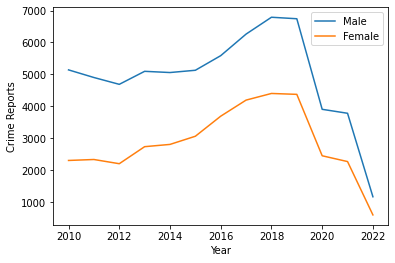

In [9]:
# Male victims
san_jose_crime_males = san_jose_crime_data[san_jose_crime_data['Gender']=='male']
# Female victims
san_jose_crime_females = san_jose_crime_data[san_jose_crime_data['Gender']=='female']

san_jose_crime_males_count_by_year = san_jose_crime_males.groupby(by='Year').count()['Crime']
san_jose_crime_females_count_by_year = san_jose_crime_females.groupby(by='Year').count()['Crime']

plt.plot(san_jose_crime_males_count_by_year)
plt.plot(san_jose_crime_females_count_by_year)
plt.legend(['Male','Female'])
plt.ylabel('Crime Reports')
plt.xlabel('Year')

Number of crime reports over the trimesters for males and females

Text(0.5, 0, 'Trimester')

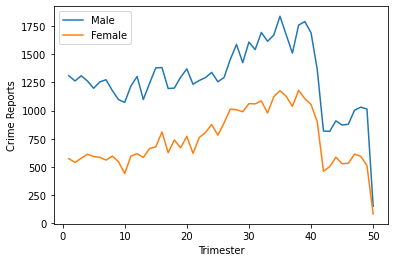

In [10]:
san_jose_crime_males_count_by_trimester = san_jose_crime_males.groupby(by='Trimester').count()['Crime']
san_jose_crime_females_count_by_trimester = san_jose_crime_females.groupby(by='Trimester').count()['Crime']

plt.plot(san_jose_crime_males_count_by_trimester)
plt.plot(san_jose_crime_females_count_by_trimester)
plt.legend(['Male','Female'])
plt.ylabel('Crime Reports')
plt.xlabel('Trimester')

Crime types for males and females, respectively

In [11]:
san_jose_crime_type_males_count = san_jose_crime_males['Crime'].value_counts('mean')
san_jose_crime_type_females_count = san_jose_crime_females['Crime'].value_counts('mean')

display(san_jose_crime_type_males_count)
display(san_jose_crime_type_females_count)

ASSAULT              0.459104
THEFT                0.293094
VEHICLE VANDALISM    0.093807
ROBBERY              0.078896
VEHICLE THEFT        0.067005
HOMICIDE             0.008094
Name: Crime, dtype: float64

THEFT                0.454592
ASSAULT              0.391579
ROBBERY              0.074295
VEHICLE VANDALISM    0.054431
VEHICLE THEFT        0.023312
HOMICIDE             0.001791
Name: Crime, dtype: float64

Top-5 crime subtypes for males and females, respectively

In [12]:
san_jose_crime_subtype_males_count = san_jose_crime_males['SubtypeCrime'].value_counts('mean')
san_jose_crime_subtype_females_count = san_jose_crime_females['SubtypeCrime'].value_counts('mean')

display(san_jose_crime_subtype_males_count.iloc[0:5])
display(san_jose_crime_subtype_females_count.iloc[0:5])


FIREARM              0.209124
DUE TO NEGLECT       0.121014
COLD WEAPON          0.114523
VEHICLE VANDALISM    0.093807
PICKPOCKETING        0.064546
Name: SubtypeCrime, dtype: float64

PICKPOCKETING     0.184494
DUE TO NEGLECT    0.158187
FIREARM           0.127790
OUTBURST          0.118032
COLD WEAPON       0.066783
Name: SubtypeCrime, dtype: float64

Number of crimes per starting hour for males and females, respectively

In [13]:
san_jose_crime_males_count_by_hour = san_jose_crime_males.groupby(['Start Hour']).count()['Crime'].reset_index()
san_jose_crime_females_count_by_hour = san_jose_crime_females.groupby(['Start Hour']).count()['Crime'].reset_index()

display(san_jose_crime_males_count_by_hour)
display(san_jose_crime_females_count_by_hour)


Start Hour  Crime
0           0   9586
1           3   4617
2           6   5027
3           9   7004
4          12   7578
5          15   8336
6          18  12880
7          21   9221

Start Hour  Crime
0           0   4055
1           3   1649
2           6   3274
3           9   4871
4          12   6529
5          15   6619
6          18   7263
7          21   3145

Number of crimes per weekday for males and females, respectively

In [14]:
san_jose_crime_males_count_by_weekday = san_jose_crime_males.groupby(['Weekday']).count()['Crime'].reset_index()
san_jose_crime_females_count_by_weekday = san_jose_crime_females.groupby(['Weekday']).count()['Crime'].reset_index()

display(san_jose_crime_males_count_by_weekday)
display(san_jose_crime_females_count_by_weekday)


Weekday  Crime
0        0   9219
1        1   8680
2        2   8702
3        3   8521
4        4  10184
5        5  10403
6        6   8540

Weekday  Crime
0        0   5418
1        1   5108
2        2   5283
3        3   5209
4        4   6022
5        5   5953
6        6   4412

Number of crimes per nationality for males and females, respectively

In [15]:
san_jose_crime_males_count_by_nationality = san_jose_crime_males.groupby(['Nationality']).count()['Crime'].reset_index()
san_jose_crime_females_count_by_nationality = san_jose_crime_females.groupby(['Nationality']).count()['Crime'].reset_index()

display(san_jose_crime_males_count_by_nationality.sort_values('Crime', ascending=False))
display(san_jose_crime_females_count_by_nationality.sort_values('Crime', ascending=False))


Nationality  Crime
21       COSTA RICA  47302
67        NICARAGUA   9114
25      Desconocido   3216
33   ESTADOS UNIDOS    678
15         COLOMBIA    620
..              ...    ...
84           SERBIA      1
42     GUINEA-BISAU      1
59       LUXEMBURGO      1
65       MOZAMBIQUE      1
101        ZIMBABUE      1

[102 rows x 2 columns]

Nationality  Crime
21      COSTA RICA  28064
61       NICARAGUA   5440
26     Desconocido   1124
32  ESTADOS UNIDOS    352
17        COLOMBIA    352
..             ...    ...
53      KAZAJISTAN      1
60         NAMIBIA      1
54         LETONIA      1
58       MARRUECOS      1
22         CROACIA      1

[84 rows x 2 columns]

Number of crimes per age for males and females, respectively

In [16]:
san_jose_crime_males_count_by_age = san_jose_crime_males.groupby(['Age']).count()['Crime'].reset_index()
san_jose_crime_females_count_by_age = san_jose_crime_females.groupby(['Age']).count()['Crime'].reset_index()

display(san_jose_crime_males_count_by_age.sort_values('Crime', ascending=False))
display(san_jose_crime_females_count_by_age.sort_values('Crime', ascending=False))


Age  Crime
2   >18 y/o  56798
0  < 18 y/o   3392
1  > 60 y/o   2609
3   unknown   1450

Age  Crime
2   >18 y/o  34084
1  > 60 y/o   1279
0  < 18 y/o   1208
3   unknown    834

Number of crimes per victim subtype for males and females, respectively

In [17]:
san_jose_crime_males_count_by_victim = san_jose_crime_males.groupby(['SubtypeVictim']).count()['Crime'].reset_index()
san_jose_crime_females_count_by_victim = san_jose_crime_females.groupby(['SubtypeVictim']).count()['Crime'].reset_index()

display(san_jose_crime_males_count_by_victim.sort_values('Crime', ascending=False))
display(san_jose_crime_females_count_by_victim.sort_values('Crime', ascending=False))


SubtypeVictim  Crime
57                     PEDESTRIAN [PERSON]  24451
14                           CAR [VEHICLE]   6160
49               NOT APPLICEABLE [HOUSING]   4138
56  PASSENGER OF PUBLIC TRANSPORT [PERSON]   2878
22           CUSTOMER LOCAL STORE [PERSON]   2866
..                                     ...    ...
0                        AQUATIC [VEHICLE]      2
70                STREET CHILDREN [PERSON]      1
77                 UNCLASSIFIED [BUILDING]      1
25                         FARMER [PERSON]      1
12                   CAR RENTAL [BUILDING]      1

[86 rows x 2 columns]

SubtypeVictim  Crime
56                             PEDESTRIAN [PERSON]  15136
48                       NOT APPLICEABLE [HOUSING]   3396
14                                   CAR [VEHICLE]   3265
22                   CUSTOMER LOCAL STORE [PERSON]   3128
55          PASSENGER OF PUBLIC TRANSPORT [PERSON]   2771
..                                             ...    ...
37  LIGHT CARGO/MESSENGER/DEBT COLLECTOR [VEHICLE]      1
75                         UNCLASSIFIED [BUILDING]      1
12                           CAR RENTAL [BUILDING]      1
58                 PERSON WITHOUT HOUSING [PERSON]      1
0                                AQUATIC [VEHICLE]      1

[82 rows x 2 columns]

Select crime reports for female victims and normalise the by population and number of days per year. From this point on, we just analyse crime reports from female victims in order to focus on our target population.

In [18]:
# Number of elements per district in percentage
san_jose_crime_data.groupby('District').count()['Crime']/san_jose_crime_data.groupby('District').count()['Crime'].sum() * 100

District
CARMEN                        9.163175
CATEDRAL                     15.289538
DESCONOCIDO                   1.385599
HATILLO                       7.243472
HOSPITAL                     16.948421
MATA REDONDA                  5.772532
MERCED                       12.847239
PAVAS                         9.058655
SAN FRANCISCO DE DOS RIOS     4.331316
SAN SEBASTIAN                 7.178268
URUCA                         6.582796
ZAPOTE                        4.198989
Name: Crime, dtype: float64

There are about 1.4% crime reports from unknown districts. As we do not know the districts where the crimes happened, we removed that data.

In [19]:
# Remove data from unknown districts
san_jose_crime_data = san_jose_crime_data[san_jose_crime_data['District']!='DESCONOCIDO']

In [20]:
# San Jose Crime Data (Female Victims)
san_jose_crime_data_female = san_jose_crime_data[san_jose_crime_data['Gender']=='female']

# San Jose Districts Population
san_jose_district_population = san_jose_district_dataset[['District','Población total']]
san_jose_district_population = san_jose_district_population.set_index('District')
san_jose_district_population = san_jose_district_population.sort_index()
san_jose_district_population = san_jose_district_population.transpose()

# Number of days for each period
number_days_each_year = get_number_days_period(san_jose_crime_data_female,'Year')
number_days_each_trimester = get_number_days_period(san_jose_crime_data_female,'Trimester')

# San Jose Crime Reports Count
time_period = 'Year'
san_jose_districts_subtypes_count_year = get_crime_subtype_count_by_district(san_jose_crime_data_female,time_period)
san_jose_districts_subtypes_count_year_normalised = normalise_data_population_days(san_jose_districts_subtypes_count_year,
                                                                                   san_jose_district_population,
                                                                                   number_days_each_year)

time_period = 'Trimester'
san_jose_districts_subtypes_count_trimester = get_crime_subtype_count_by_district(san_jose_crime_data_female,time_period)
san_jose_districts_subtypes_count_trimester_normalised = normalise_data_population_days(san_jose_districts_subtypes_count_trimester,
                                                                                        san_jose_district_population,
                                                                                        number_days_each_trimester)

Crime rates over the years for each district for female victims

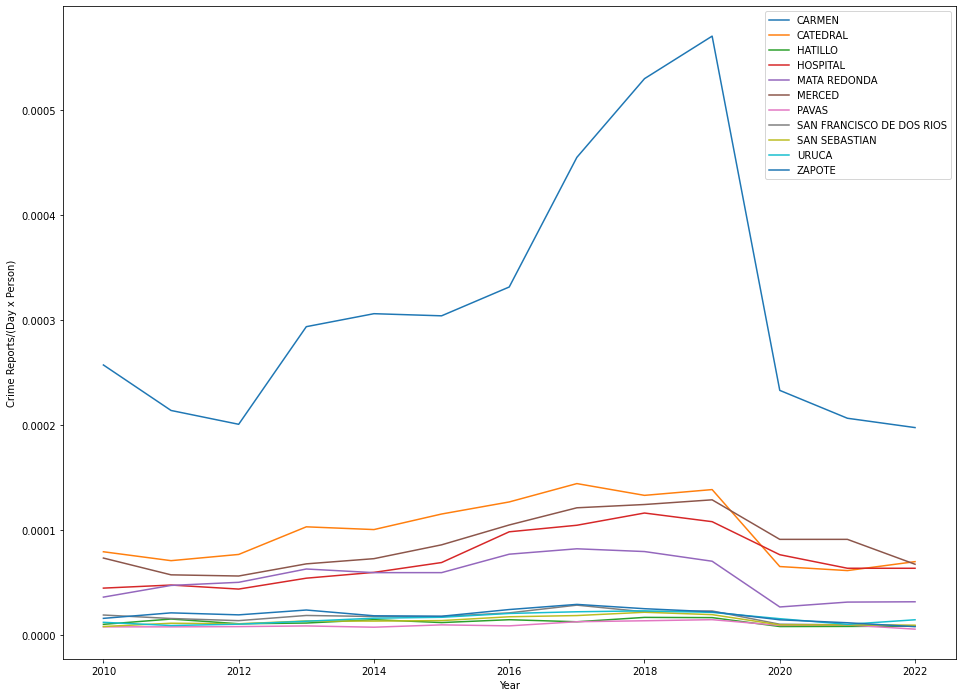

In [21]:
plot_normalised_crime_rates(san_jose_districts_subtypes_count_year_normalised,'Year')

Crime rates over the trimesters for each district for female victims

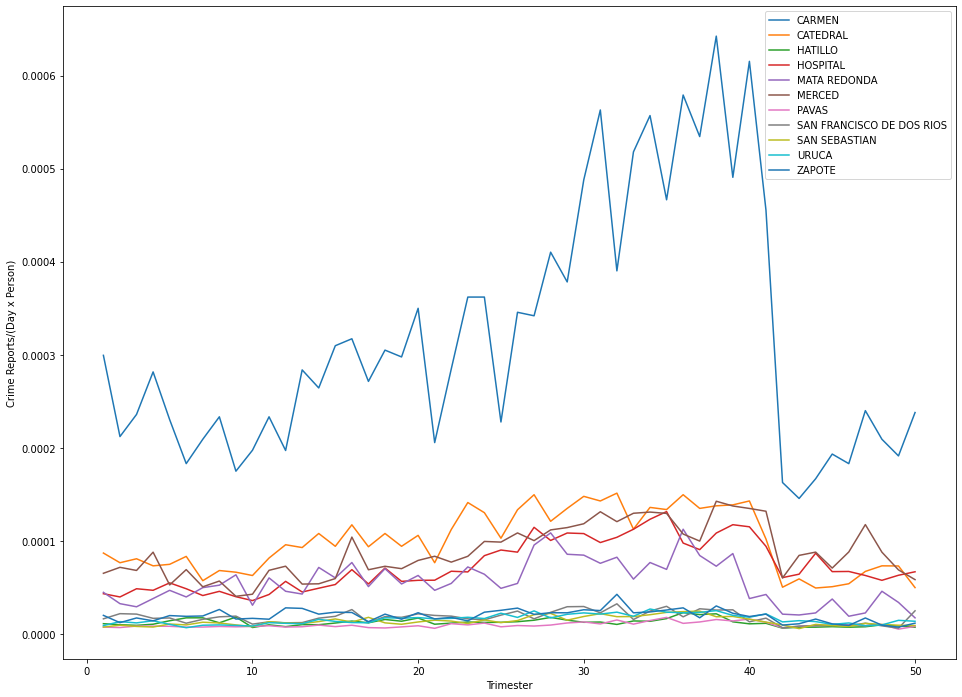

In [22]:
plot_normalised_crime_rates(san_jose_districts_subtypes_count_trimester_normalised,'Trimester')

Compute geographic data from OpenStreetMaps

In [23]:
###### Get Relation polygons [1]
# obtained from https://www.wikidata.org/wiki/Q2536213
cantons_relations_dict = {'San José Canton': 4069041}
districts_relations_dict = {'El Carmen, San Jose': 4068775,
                  'Merced': 4068748,
                  'Hospital': 4067760,
                  'Catedral': 4068747,
                  'Zapote': 4068932,
                  'San Francisco de Dos Ríos': 4068936,
                  'Uruca': 4069038,
                  'Mata Redonda': 4067748,
                  'Pavas': 4069037,
                  'Hatillo': 4068994,
                  'San Sebastián': 4068984}

districts_polygons = createPolygon_dataframe(districts_relations_dict) # get the coordinates of each district border

#### Get points of interest                                      
dataframe_POIs = create_OpenStreetMap_POIs_dataset(districts_polygons)

<ipython-input-3-9d8ee5f27e00>:386: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dataframe_POIs.insert (3, "Centroid", dataframe_POIs['geometry'].centroid)


### Safety Index

In order to build the safety index for this challenge, we used several safety indicators sustained by other safety indexes and related research, and by the available data. More specifically, the following indexes were analyzed: Safe Cities Index 2021 (The Economist) [2], Index on Gender Friendly Cities (Safetipin) [3], Women Peace and Security Index 2021 (Georgetown University’s Institute for Women, Peace and Security and The Peace Research Institute Oslo) [4], and Safest Cities for Women (ValuePenguin) [5]. Those indexes include analysis from all geographical areas and most of them are focused on women, which is of special interest in the project.

Typically, indexes are divided into categories that represent a given area of analysis, e.g. healthcare or education. For each category, several indicators related to what we want to address are considered. Often, each indicator is given the same importance within the same category, and a score for each category is obtained. Finally, the final score is obtained as an average of those individual scores. The same approach was followed by us.

Having that research done, it was necessary to observe the available data and see what indicators we could address. Taking that into account, we created our own indicators based on what previous research indicates as important factors for safety measure/categorization and its relationship with the available data. Shortly, 6 different categories were considered: Security, Healthcare, Transportation, Economical, Education, and Public Areas. For each category, related indicators that could be retrieved from the available data were considered. According to literature and other indexes, a good score on those categories is important for the personal feeling of being free from danger, i.e., for the citizen’s safety.

The following indicators were used:

1. Security 
  - 1.1 Security level of the 2017 Social Development Index
  - 1.2 Security facilities per district area
  - 1.3 Crime rates (women as victims) per inhabitants*

2. Healthcare
  - 2.1 Healthcare level of the 2017 Social Development Index
  - 2.2 Healthcare facilities per district area

3. Economics
  - 3.1 Economic level of the 2017 Social Development Index
  - 3.2 Percentage of people without social security 2011 census*
  - 3.3 Demographic dependency ratio (%)*

4. Education
  - 4.1 Education level of the 2017 Social Development Index
  - 4.2 Education facilities per district area

5. Public Transportation
  - 5.1 Taxi stations per district area
  - 5.2 Bus stations per district area

6. Public areas
  - 6.1 Public use areas per district area
  - 6.2 Green areas per district area
  - 6.3 Commercial centers per district area
  - 6.4 Communal areas per district area
  - 6.5 Governmental building per district area
  - 6.6 Green areas per district area
  - 6.7 Heritage buildings per district area
  - 6.8 Entertainment/Culture buildings per district area
  - 6.9 Churches/temples buildings per district area

Safety index = 1/6 * Security + 1/6 * Healthcare + 1/6 * Economics + 1/6 * Education + 1/6 * Public Transportation + 1/6 * Public areas

Note: * Those indicators are negative ones (the lower the value, the best), so their inverse is used in the index.

Indicators 1.1, 2.1, 3.1, 3.2, 3.3, 4.1 were already normalized (0-100%) so their value was direclty taken. Crime rates were normalized by the maximum value of all the years (so that different years/trimesters can be compared). The other indicators were also normalized by the maximum value, as is usually done in safety indexes.

We only have temporal data for crime rates, so this will be the only indicators that varies for different trimesters and years. For the other indicators, the values are always the same.

The safety index plots are presented in the Visualizations section.

Create the safety index for the different districts by trimester and by year.

In [24]:
# San Jose districts
san_jose_districts = san_jose_districts_subtypes_count_year_normalised.columns

# District IDs
arcgis_data['Districts'] = arcgis_data['Districts'].rename(columns={'Id_Distrito': 'ID_DISTRITO'})
arcgis_data['Districts'] = arcgis_data['Districts'].rename(columns={'Nombre': 'NOMBRE_DISTRITO'})
district_id_names = arcgis_data['Districts'][['ID_DISTRITO','NOMBRE_DISTRITO']]
arcgis_data['Districts']['Shape.STArea()_Km2'] = arcgis_data['Districts']['Shape.STArea()']/1e6
arcgis_data['Districts'] = arcgis_data['Districts'].sort_values(by='NOMBRE_DISTRITO')

#---------------------------

# SECURITY CATEGORY

# Security category of the IDS 2017 by district
security_measure  = san_jose_district_dataset[['District', 'Seguridad']]
security_measure = security_measure.sort_values(by=['District'])

# number of security facilities per district
nr_security_facilities_area = get_normalised_number_infrastructure(arcgis_data, 'Security', district_id_names)

# Join values

nr_indicators = 3

security_index_year = 0
crime_rates_district_year = san_jose_districts_subtypes_count_year_normalised.groupby('Year').sum()
crime_rates_district_year = crime_rates_district_year/crime_rates_district_year.max().max()
security_index_year = security_index_year + (1 - crime_rates_district_year).values
security_index_year = security_index_year + security_measure.values[:,1]/100
security_index_year = security_index_year + nr_security_facilities_area.values.flatten()
security_index_year = security_index_year/nr_indicators

security_index_trimester = 0
crime_rates_district_trimester = san_jose_districts_subtypes_count_trimester_normalised.groupby('Trimester').sum()
crime_rates_district_trimester = crime_rates_district_trimester/crime_rates_district_trimester.max().max()
security_index_trimester = security_index_trimester + (1 - crime_rates_district_trimester).values
security_index_trimester = security_index_trimester + security_measure.values[:,1]/100
security_index_trimester = security_index_trimester + nr_security_facilities_area.values.flatten()
security_index_trimester = security_index_trimester/nr_indicators

#---------------------------

# HEALTHCARE CATEGORY

# number of healthcare facilities per district
nr_healthcare_facilities_area = get_normalised_number_infrastructure(arcgis_data, 'Healthcare', district_id_names)

# Health category of the IDS 2017 by district
healthcare_measure  = san_jose_district_dataset[['District', 'Salud']]
healthcare_measure = healthcare_measure.sort_values(by=['District'])

# Join values

nr_indicators = 2
healthcare_index = 0
healthcare_index += healthcare_measure.values[:,1]/100/nr_indicators
healthcare_index += nr_healthcare_facilities_area.values.flatten()/nr_indicators

#---------------------------

# ECONOMICS CATEGORY

# economic category of the IDS 2017 by district
economic_measure  = san_jose_district_dataset[['District', 'Económica']]
economic_measure = economic_measure.sort_values(by=['District'])

# Percentage of people without social security 2011 census
social_security_measure  = san_jose_district_dataset[['District', 'Porcentaje de población no asegurada']]
social_security_measure = social_security_measure.sort_values(by=['District'])

# Demographic dependency ratio (%): Corresponds to a demographic measure to express the ratio of the population, 
# in terms of age, between potentially active people and potentially dependent (inactive) people. 2011 census 
demographic_dependency_measure  = san_jose_district_dataset[['District', 'Relación dependencia demográfica']]
demographic_dependency_measure = demographic_dependency_measure.sort_values(by=['District'])

# Join values
nr_indicators = 3
economical_index = 0
economical_index += economic_measure.values[:,1]/100/nr_indicators
economical_index += (1-social_security_measure.values[:,1]/100)/nr_indicators
economical_index += (1-demographic_dependency_measure.values[:,1]/100)/nr_indicators


#---------------------------

# EDUCATION CATEGORY

# Education category of the IDS 2017 by district
education_measure  = san_jose_district_dataset[['District', 'Educación']]
education_measure = education_measure.sort_values(by=['District'])

# number of education facilities per district
nr_education_facilities_area = get_normalised_number_infrastructure(arcgis_data, 'Schools', district_id_names)

# Join values
nr_indicators = 2

education_index = 0
education_index += education_measure.values[:,1]/100/nr_indicators
education_index += nr_education_facilities_area.values.flatten()/nr_indicators


#---------------------------

# PUBLIC TRANSPORTATION CATEGORY

# Taxi from OpenStreetMaps
districts_taxis = dataframe_POIs[dataframe_POIs['amenity']=='taxi']['DistrictName'].str.upper().apply(unidecode).values
count_taxis_districts = count_existance(districts_taxis, san_jose_districts)

# Bus station from OpenStreetMaps
districts_bus_stations = dataframe_POIs[dataframe_POIs['amenity']=='bus_station']['DistrictName'].str.upper().apply(unidecode).values
count_bus_station_districts = count_existance(districts_bus_stations, san_jose_districts) # ver normalizacao

# Join values
nr_indicators = 2
transports_index = 0
transports_index += count_taxis_districts[0]/nr_indicators
transports_index += count_bus_station_districts[0]/nr_indicators


#---------------------------

# PUBLIC AREAS CATEGORY

# Public use areas
nr_public_use_areas_area = get_normalised_number_infrastructure(arcgis_data, 'Public Areas', district_id_names)

# Green areas
nr_green_areas_area = get_normalised_number_infrastructure(arcgis_data, 'Green Areas', district_id_names)

# Commercial centers
nr_commercial_centers_area = get_normalised_number_infrastructure(arcgis_data, 'Commercial Centers', district_id_names)

# Communal areas
nr_communal_area = get_normalised_number_infrastructure(arcgis_data, 'Communal Areas', district_id_names)

# Governmental building
nr_governmental_buildings_area = get_normalised_number_infrastructure(arcgis_data, 'Governmental', district_id_names)

# Heritage buildings
nr_heritage_buildings_area = get_normalised_number_infrastructure(arcgis_data, 'Heritage', district_id_names)

# Entertainment/Culture buildings
nr_culture_buildings_area = get_normalised_number_infrastructure(arcgis_data, 'Culture', district_id_names)

# Churches
nr_churches_area = get_normalised_number_infrastructure(arcgis_data, 'Churches', district_id_names)

# Join values
nr_indicators = 8

public_areas_index = 0
public_areas_index += nr_public_use_areas_area.values.flatten()/nr_indicators
public_areas_index += nr_green_areas_area.values.flatten()/nr_indicators
public_areas_index += nr_commercial_centers_area.values.flatten()/nr_indicators
public_areas_index += nr_communal_area.values.flatten()/nr_indicators
public_areas_index += nr_governmental_buildings_area.values.flatten()/nr_indicators
public_areas_index += nr_heritage_buildings_area.values.flatten()/nr_indicators
public_areas_index += nr_culture_buildings_area.values.flatten()/nr_indicators
public_areas_index += nr_churches_area.values.flatten()/nr_indicators

#---------------------------

# SAFETY INDEX

# Summing all values to build safety index
security_weight = 1/6
education_weight = 1/6
healthcare_weight = 1/6
economical_weight = 1/6
public_areas_weight = 1/6
transports_weight = 1/6

# Year 
safety_index_year = 0
safety_index_year += security_index_year * security_weight
safety_index_year += education_index * education_weight
safety_index_year += healthcare_index * healthcare_weight
safety_index_year += economical_index * economical_weight
safety_index_year += public_areas_index * public_areas_weight
safety_index_year += transports_index * transports_weight
safety_index_year = pd.DataFrame(safety_index_year, columns=san_jose_districts)

# Trimester 
safety_index_trimester = 0
safety_index_trimester += security_index_trimester * security_weight
safety_index_trimester += education_index * education_weight
safety_index_trimester += healthcare_index * healthcare_weight
safety_index_trimester += economical_index * economical_weight
safety_index_trimester += public_areas_index * public_areas_weight
safety_index_trimester += transports_index * transports_weight
safety_index_trimester = pd.DataFrame(safety_index_trimester, columns=san_jose_districts)

<ipython-input-3-9d8ee5f27e00>:775: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nr_infrastructure = nr_infrastructure.append(empty_values)
<ipython-input-3-9d8ee5f27e00>:775: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nr_infrastructure = nr_infrastructure.append(empty_values)
<ipython-input-3-9d8ee5f27e00>:775: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nr_infrastructure = nr_infrastructure.append(empty_values)


### Prediction

Based on EDA, we concluded that the crime data in 2020, 2021, and 2022 were biased due to the COVID-19 pandemic and lockdowns. Therefore, we wave excluded those years from our dataset for prediction as they represent outlier points. In this years, the emerging trend in the crime rate was disrupted.
In this section, we have trained and evaluated two models - autoregressive integrated moving average (ARIMA) and logistic regression) to predict the safety index in the year 2018 and 2019, by trimester and year.

#### Trimester

In [25]:
training_index = 32 # Years 2010-2017

y_carmen = safety_index_trimester.iloc[0:training_index,0].values
y_catedral = safety_index_trimester.iloc[0:training_index,1].values
y_hatillo = safety_index_trimester.iloc[0:training_index,2].values
y_hospital = safety_index_trimester.iloc[0:training_index,3].values
y_mata_redonda = safety_index_trimester.iloc[0:training_index,4].values
y_merced = safety_index_trimester.iloc[0:training_index,5].values
y_pavas = safety_index_trimester.iloc[0:training_index,6].values
y_san_francisco = safety_index_trimester.iloc[0:training_index,7].values
y_san_sebastian = safety_index_trimester.iloc[0:training_index,8].values
y_uruca = safety_index_trimester.iloc[0:training_index,9].values
y_zapote = safety_index_trimester.iloc[0:training_index,10].values


##### ARIMA

In [26]:
arima_model_carmen = auto_arima(y_carmen, error_action="ignore")
arima_model_catedral = auto_arima(y_catedral, error_action="ignore")
arima_model_hatillo = auto_arima(y_hatillo, error_action="ignore")
arima_model_hospital = auto_arima(y_hospital, error_action="ignore")
arima_model_mata_redonda = auto_arima(y_mata_redonda, error_action="ignore")
arima_model_merced = auto_arima(y_merced, error_action="ignore")
arima_model_pavas = auto_arima(y_pavas, error_action="ignore")
arima_model_san_francisco = auto_arima(y_san_francisco, error_action="ignore")
arima_model_san_sebastian = auto_arima(y_san_sebastian, error_action="ignore")
arima_model_uruca = auto_arima(y_uruca, error_action="ignore")
arima_model_zapote = auto_arima(y_zapote, error_action="ignore")

In [27]:
prediction_carmen = arima_model_carmen.predict(n_periods = 8)
prediction_catedral = arima_model_catedral.predict(n_periods = 8)
prediction_hatillo = arima_model_hatillo.predict(n_periods = 8)
prediction_hospital = arima_model_hospital.predict(n_periods = 8)
prediction_mata_redonda = arima_model_mata_redonda.predict(n_periods = 8)
prediction_merced = arima_model_merced.predict(n_periods = 8)
prediction_pavas = arima_model_pavas.predict(n_periods = 8)
prediction_san_francisco = arima_model_san_francisco.predict(n_periods = 8)
prediction_san_sebastian = arima_model_san_sebastian.predict(n_periods = 8)
prediction_uruca = arima_model_uruca.predict(n_periods = 8)
prediction_zapote = arima_model_zapote.predict(n_periods = 8)

In [28]:
# Test periods
y_carmen_test = safety_index_trimester.iloc[training_index:training_index+8,0].values
y_catedral_test = safety_index_trimester.iloc[training_index:training_index+8,1].values
y_hatillo_test = safety_index_trimester.iloc[training_index:training_index+8,2].values
y_hospital_test = safety_index_trimester.iloc[training_index:training_index+8,3].values
y_mata_redonda_test = safety_index_trimester.iloc[training_index:training_index+8,4].values
y_merced_test = safety_index_trimester.iloc[training_index:training_index+8,5].values
y_pavas_test = safety_index_trimester.iloc[training_index:training_index+8,6].values
y_san_francisco_test = safety_index_trimester.iloc[training_index:training_index+8,7].values
y_san_sebastian_test = safety_index_trimester.iloc[training_index:training_index+8,8].values
y_uruca_test = safety_index_trimester.iloc[training_index:training_index+8,9].values
y_zapote_test = safety_index_trimester.iloc[training_index:training_index+8,10].values

# Errors
print('-----Relative root mean squared error (ARIMA)-----')
print('Carmen: ' +f'{relative_rmse(y_carmen_test,prediction_carmen) * 100}%')
print('Catedral: ' +f'{relative_rmse(y_catedral_test,prediction_catedral) * 100}%')
print('Hatilo: ' +f'{relative_rmse(y_hatillo_test,prediction_hatillo) * 100}%')
print('Hospital: ' +f'{relative_rmse(y_hospital_test,prediction_hospital) * 100}%')
print('Mata Redonda: ' +f'{relative_rmse(y_mata_redonda_test,prediction_mata_redonda) * 100}%')
print('Merced: ' +f'{relative_rmse(y_merced_test,prediction_merced) * 100}%')
print('Pavas: ' +f'{relative_rmse(y_pavas_test,prediction_pavas) * 100}%')
print('San Francisco: ' +f'{relative_rmse(y_san_francisco_test,prediction_san_francisco) * 100}%')
print('San Sebastian: ' +f'{relative_rmse(y_san_sebastian_test,prediction_san_sebastian) * 100}%')
print('Uruca: ' +f'{relative_rmse(y_uruca_test,prediction_uruca) * 100}%')
print('Zapote: ' +f'{relative_rmse(y_zapote_test,prediction_zapote) * 100}%')

-----Relative root mean squared error (ARIMA)-----
Carmen: 170.0%
Catedral: 33.0%
Hatilo: 12.0%
Hospital: 22.0%
Mata Redonda: 53.0%
Merced: 23.0%
Pavas: 4.0%
San Francisco: 15.0%
San Sebastian: 6.0%
Uruca: 7.000000000000001%
Zapote: 25.0%


##### Linear Regression

In [29]:
# Create features
years_trimesters = san_jose_districts_subtypes_count_trimester_normalised.index.levels[1].values
years_trimesters_in_list = []
for idx in range(len(years_trimesters)):
    years_trimesters_in_list.append([2009 + np.ceil(years_trimesters[idx]/4), years_trimesters[idx]])
years_trimesters = np.array(years_trimesters_in_list)

# Remove covid years
years_trimesters_training = years_trimesters[0:training_index]

lr_carmen,scaler_carmen = training_forecast_model(y_carmen,years_trimesters_training,training_index)
lr_catedral,scaler_catedral = training_forecast_model(y_catedral,years_trimesters_training,training_index)
lr_hatillo,scaler_hatillo = training_forecast_model(y_hatillo,years_trimesters_training,training_index)
lr_hospital,scaler_hospital = training_forecast_model(y_hospital,years_trimesters_training,training_index)
lr_mata_redonda,scaler_mata_redonda = training_forecast_model(y_mata_redonda,years_trimesters_training,training_index)
lr_merced,scaler_merced = training_forecast_model(y_merced,years_trimesters_training,training_index)
lr_pavas,scaler_pavas = training_forecast_model(y_pavas,years_trimesters_training,training_index)
lr_san_francisco,scaler_san_francisco = training_forecast_model(y_san_francisco,years_trimesters_training,training_index)
lr_san_sebastian,scaler_san_sebastian = training_forecast_model(y_san_sebastian,years_trimesters_training,training_index)
lr_uruca,scaler_uruca = training_forecast_model(y_uruca,years_trimesters_training,training_index)
lr_zapote,scaler_zapote = training_forecast_model(y_zapote,years_trimesters_training,training_index)

In [30]:
periods = 8
years_trimesters_testing = years_trimesters[32:32+periods]
prediction_carmen_lr = forecast_time_series(lr_carmen,scaler_carmen,y_carmen,years_trimesters_testing,periods)
prediction_catedral_lr = forecast_time_series(lr_catedral,scaler_catedral,y_catedral,years_trimesters_testing,periods)
prediction_hatillo_lr = forecast_time_series(lr_hatillo,scaler_hatillo,y_hatillo,years_trimesters_testing,periods)
prediction_hospital_lr = forecast_time_series(lr_hospital,scaler_hospital,y_hospital,years_trimesters_testing,periods)
prediction_mata_redonda_lr = forecast_time_series(lr_mata_redonda,scaler_mata_redonda,y_mata_redonda,years_trimesters_testing,periods)
prediction_merced_lr = forecast_time_series(lr_merced,scaler_merced,y_merced,years_trimesters_testing,periods)
prediction_pavas_lr = forecast_time_series(lr_pavas,scaler_pavas,y_pavas,years_trimesters_testing,periods)
prediction_san_francisco_lr = forecast_time_series(lr_san_francisco,scaler_san_francisco,y_san_francisco,years_trimesters_testing,periods)
prediction_san_sebastian_lr = forecast_time_series(lr_san_sebastian,scaler_san_sebastian,y_san_sebastian,years_trimesters_testing,periods)
prediction_uruca_lr = forecast_time_series(lr_uruca,scaler_uruca,y_uruca,years_trimesters_testing,periods)
prediction_zapote_lr = forecast_time_series(lr_zapote,scaler_zapote,y_zapote,years_trimesters_testing,periods)

In [31]:
# Errors
print('-----Relative root mean squared error (Linear Regression)-----')
print('Carmen: ' +f'{relative_rmse(y_carmen_test,prediction_carmen_lr) * 100}%')
print('Catedral: ' +f'{relative_rmse(y_catedral_test,prediction_catedral_lr) * 100}%')
print('Hatilo: ' +f'{relative_rmse(y_hatillo_test,prediction_hatillo_lr) * 100}%')
print('Hospital: ' +f'{relative_rmse(y_hospital_test,prediction_hospital_lr) * 100}%')
print('Mata Redonda: ' +f'{relative_rmse(y_mata_redonda_test,prediction_mata_redonda_lr) * 100}%')
print('Merced: ' +f'{relative_rmse(y_merced_test,prediction_merced_lr) * 100}%')
print('Pavas: ' +f'{relative_rmse(y_pavas_test,prediction_pavas_lr) * 100}%')
print('San Francisco: ' +f'{relative_rmse(y_san_francisco_test,prediction_san_francisco_lr) * 100}%')
print('San Sebastian: ' +f'{relative_rmse(y_san_sebastian_test,prediction_san_sebastian_lr) * 100}%')
print('Uruca: ' +f'{relative_rmse(y_uruca_test,prediction_uruca_lr) * 100}%')
print('Zapote: ' +f'{relative_rmse(y_zapote_test,prediction_zapote_lr) * 100}%')

-----Relative root mean squared error (Linear Regression)-----
Carmen: 162.0%
Catedral: 28.000000000000004%
Hatilo: 11.0%
Hospital: 24.0%
Mata Redonda: 50.0%
Merced: 23.0%
Pavas: 4.0%
San Francisco: 13.0%
San Sebastian: 6.0%
Uruca: 8.0%
Zapote: 14.000000000000002%


#### Year

In [32]:
training_index = 8 # Years 2010-2017

y_carmen_year = safety_index_year.iloc[0:training_index,0].values
y_catedral_year = safety_index_year.iloc[0:training_index,1].values
y_hatillo_year = safety_index_year.iloc[0:training_index,2].values
y_hospital_year = safety_index_year.iloc[0:training_index,3].values
y_mata_redonda_year = safety_index_year.iloc[0:training_index,4].values
y_merced_year = safety_index_year.iloc[0:training_index,5].values
y_pavas_year = safety_index_year.iloc[0:training_index,6].values
y_san_francisco_year = safety_index_year.iloc[0:training_index,7].values
y_san_sebastian_year = safety_index_year.iloc[0:training_index,8].values
y_uruca_year = safety_index_year.iloc[0:training_index,9].values
y_zapote_year = safety_index_year.iloc[0:training_index,10].values


##### ARIMA

In [33]:
arima_model_carmen = auto_arima(y_carmen_year, error_action="ignore")
arima_model_catedral = auto_arima(y_catedral_year, error_action="ignore")
arima_model_hatillo = auto_arima(y_hatillo_year, error_action="ignore")
arima_model_hospital = auto_arima(y_hospital_year, error_action="ignore")
arima_model_mata_redonda = auto_arima(y_mata_redonda_year, error_action="ignore")
arima_model_merced = auto_arima(y_merced_year, error_action="ignore")
arima_model_pavas = auto_arima(y_pavas_year, error_action="ignore")
arima_model_san_francisco = auto_arima(y_san_francisco_year, error_action="ignore")
arima_model_san_sebastian = auto_arima(y_san_sebastian_year, error_action="ignore")
arima_model_uruca = auto_arima(y_uruca_year, error_action="ignore")
arima_model_zapote = auto_arima(y_zapote_year, error_action="ignore")

In [34]:
prediction_carmen_year = arima_model_carmen.predict(n_periods = 2)
prediction_catedral_year = arima_model_catedral.predict(n_periods = 2)
prediction_hatillo_year = arima_model_hatillo.predict(n_periods = 2)
prediction_hospital_year = arima_model_hospital.predict(n_periods = 2)
prediction_mata_redonda_year = arima_model_mata_redonda.predict(n_periods = 2)
prediction_merced_year = arima_model_merced.predict(n_periods = 2)
prediction_pavas_year = arima_model_pavas.predict(n_periods = 2)
prediction_san_francisco_year = arima_model_san_francisco.predict(n_periods = 2)
prediction_san_sebastian_year = arima_model_san_sebastian.predict(n_periods = 2)
prediction_uruca_year = arima_model_uruca.predict(n_periods = 2)
prediction_zapote_year = arima_model_zapote.predict(n_periods = 2)

In [35]:
# Test periods
y_carmen_year_test = safety_index_year.iloc[training_index:training_index+2,0].values
y_catedral_year_test = safety_index_year.iloc[training_index:training_index+2,1].values
y_hatillo_year_test = safety_index_year.iloc[training_index:training_index+2,2].values
y_hospital_year_test = safety_index_year.iloc[training_index:training_index+2,3].values
y_mata_redonda_year_test = safety_index_year.iloc[training_index:training_index+2,4].values
y_merced_year_test = safety_index_year.iloc[training_index:training_index+2,5].values
y_pavas_year_test = safety_index_year.iloc[training_index:training_index+2,6].values
y_san_francisco_year_test = safety_index_year.iloc[training_index:training_index+2,7].values
y_san_sebastian_year_test = safety_index_year.iloc[training_index:training_index+2,8].values
y_uruca_year_test = safety_index_year.iloc[training_index:training_index+2,9].values
y_zapote_year_test = safety_index_year.iloc[training_index:training_index+2,10].values

# Errors
print('-----Relative root mean squared error (ARIMA)-----')
print('Carmen: ' +f'{relative_rmse(y_carmen_year_test,prediction_carmen_year) * 100}%')
print('Catedral: ' +f'{relative_rmse(y_catedral_year_test,prediction_catedral_year) * 100}%')
print('Hatilo: ' +f'{relative_rmse(y_hatillo_year_test,prediction_hatillo_year) * 100}%')
print('Hospital: ' +f'{relative_rmse(y_hospital_year_test,prediction_hospital_year) * 100}%')
print('Mata Redonda: ' +f'{relative_rmse(y_mata_redonda_year_test,prediction_mata_redonda_year) * 100}%')
print('Merced: ' +f'{relative_rmse(y_merced_year_test,prediction_merced_year) * 100}%')
print('Pavas: ' +f'{relative_rmse(y_pavas_year_test,prediction_pavas_year) * 100}%')
print('San Francisco: ' +f'{relative_rmse(y_san_francisco_year_test,prediction_san_francisco_year) * 100}%')
print('San Sebastian: ' +f'{relative_rmse(y_san_sebastian_year_test,prediction_san_sebastian_year) * 100}%')
print('Uruca: ' +f'{relative_rmse(y_uruca_year_test,prediction_uruca_year) * 100}%')
print('Zapote: ' +f'{relative_rmse(y_zapote_year_test,prediction_zapote_year) * 100}%')

-----Relative root mean squared error (ARIMA)-----
Carmen: 264.0%
Catedral: 17.0%
Hatilo: 9.0%
Hospital: 61.0%
Mata Redonda: 7.000000000000001%
Merced: 54.0%
Pavas: 9.0%
San Francisco: 7.000000000000001%
San Sebastian: 6.0%
Uruca: 13.0%
Zapote: 6.0%


##### Linear Regression

In [36]:
# Create features
years = np.expand_dims([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],axis=1)

# Remove covid years
years_training = years[0:training_index]

lr_carmen,scaler_carmen = training_forecast_model(y_carmen_year,years_training,training_index)
lr_catedral,scaler_catedral = training_forecast_model(y_catedral_year,years_training,training_index)
lr_hatillo,scaler_hatillo = training_forecast_model(y_hatillo_year,years_training,training_index)
lr_hospital,scaler_hospital = training_forecast_model(y_hospital_year,years_training,training_index)
lr_mata_redonda,scaler_mata_redonda = training_forecast_model(y_mata_redonda_year,years_training,training_index)
lr_merced,scaler_merced = training_forecast_model(y_merced_year,years_training,training_index)
lr_pavas,scaler_pavas = training_forecast_model(y_pavas_year,years_training,training_index)
lr_san_francisco,scaler_san_francisco = training_forecast_model(y_san_francisco_year,years_training,training_index)
lr_san_sebastian,scaler_san_sebastian = training_forecast_model(y_san_sebastian_year,years_training,training_index)
lr_uruca,scaler_uruca = training_forecast_model(y_uruca_year,years_training,training_index)
lr_zapote,scaler_zapote = training_forecast_model(y_zapote_year,years_training,training_index)

In [37]:
periods = 2
years_testing = years[8:8+periods]
prediction_carmen_lr_year = forecast_time_series(lr_carmen,scaler_carmen,y_carmen_year,years_testing,periods)
prediction_catedral_lr_year = forecast_time_series(lr_catedral,scaler_catedral,y_catedral_year,years_testing,periods)
prediction_hatillo_lr_year = forecast_time_series(lr_hatillo,scaler_hatillo,y_hatillo_year,years_testing,periods)
prediction_hospital_lr_year = forecast_time_series(lr_hospital,scaler_hospital,y_hospital_year,years_testing,periods)
prediction_mata_redonda_lr_year = forecast_time_series(lr_mata_redonda,scaler_mata_redonda,y_mata_redonda_year,years_testing,periods)
prediction_merced_lr_year = forecast_time_series(lr_merced,scaler_merced,y_merced_year,years_testing,periods)
prediction_pavas_lr_year = forecast_time_series(lr_pavas,scaler_pavas,y_pavas_year,years_testing,periods)
prediction_san_francisco_lr_year = forecast_time_series(lr_san_francisco,scaler_san_francisco,y_san_francisco_year,years_testing,periods)
prediction_san_sebastian_lr_year = forecast_time_series(lr_san_sebastian,scaler_san_sebastian,y_san_sebastian_year,years_testing,periods)
prediction_uruca_lr_year = forecast_time_series(lr_uruca,scaler_uruca,y_uruca_year,years_testing,periods)
prediction_zapote_lr_year = forecast_time_series(lr_zapote,scaler_zapote,y_zapote_year,years_testing,periods)

In [38]:
# Errors
print('-----Relative root mean squared error (Linear Regression)-----')
print('Carmen: ' +f'{relative_rmse(y_carmen_year_test,prediction_carmen_lr_year) * 100}%')
print('Catedral: ' +f'{relative_rmse(y_catedral_year_test,prediction_catedral_lr_year) * 100}%')
print('Hatilo: ' +f'{relative_rmse(y_hatillo_year_test,prediction_hatillo_lr_year) * 100}%')
print('Hospital ' +f'{relative_rmse(y_hospital_year_test,prediction_hospital_lr_year) * 100}%')
print('Mata Redonda: ' +f'{relative_rmse(y_mata_redonda_year_test,prediction_mata_redonda_lr_year) * 100}%')
print('Merced: ' +f'{relative_rmse(y_merced_year_test,prediction_merced_lr_year) * 100}%')
print('Pavas: ' +f'{relative_rmse(y_pavas_year_test,prediction_pavas_lr_year) * 100}%')
print('San Francisco: ' +f'{relative_rmse(y_san_francisco_year_test,prediction_san_francisco_lr_year) * 100}%')
print('San Sebastian: ' +f'{relative_rmse(y_san_sebastian_year_test,prediction_san_sebastian_lr_year) * 100}%')
print('Uruca: ' +f'{relative_rmse(y_uruca_year_test,prediction_uruca_lr_year) * 100}%')
print('Zapote: ' +f'{relative_rmse(y_zapote_year_test,prediction_zapote_lr_year) * 100}%')

-----Relative root mean squared error (Linear Regression)-----
Carmen: 187.0%
Catedral: 36.0%
Hatilo: 5.0%
Hospital 193.0%
Mata Redonda: 32.0%
Merced: 16.0%
Pavas: 18.0%
San Francisco: 17.0%
San Sebastian: 6.0%
Uruca: 6.0%
Zapote: 10.0%


#### Conclusions

Results evidence that linear regression model was able to better fit the trend of data than ARIMA model since ARIMA outputs constant lines for some districts.
Regarding the forecasted trend, both models predicted a decrease on the safety index for the following trimesters. Concerning yearly predictions, ARIMA expects an increase on the safety index whereas linear regression mostly predicts a decrease which is in accordance with the trimester prediction. In this case, ARIMA seems to be better prepared for forecasting since most of the districts showed a small increase on the safety index in the last two years before COVID-19 pandemic.

## 🖼️ Visualisations

Bellow we present the safety index by district in a map, as well as its temporal variation by trimester and year.

#### Plot Safety Index (Trimester) - All Data

In [39]:
list_datetimes_trimester = pd.date_range('2010-01-01', periods = 50, freq = 'QS').astype(int) // 10**9
list_datetimes_trimester = list_datetimes_trimester.astype(str)

map_trimester = plotSafetyIndexOverTime(list_datetimes_trimester, districts_polygons, safety_index_trimester)

f = folium.Figure(width=1000, height=1000)
map_trimester.add_to(f)

#### Plot Safety Index (Year) - All Data

In [40]:
list_datetimes_year = pd.date_range('2010-01-01', periods = 13, freq = 'YS').astype(int) // 10**9
list_datetimes_year = list_datetimes_year.astype(str)

map_year = plotSafetyIndexOverTime(list_datetimes_year, districts_polygons, safety_index_year)

f = folium.Figure(width=1000, height=1000)
map_year.add_to(f)

#### Plot of Safety Index Individual Components(Security, Education, Healthcare, Economics, Public Areas, Public Transportation) 
Below we present the variation of each component of the safety index by district. This way we can have a better understand of which components need to be improved to increase the safety index. Moreover, this detailed presentations is better for policy makers to understand which components they need to change/improve.

In [41]:
data_individual_index = pd.DataFrame({'Education': education_index,
                                      'Healthcare': healthcare_index,
                                      'Economics': economical_index,
                                      'PubAreas': public_areas_index,
                                      'PublicTransportation': transports_index,
                                      'Name': ['CARMEN', 'CATEDRAL', 'HATILLO', 'HOSPITAL', 'MATA REDONDA',
                                    'MERCED', 'PAVAS', 'SAN FRANCISCO DE DOS RIOS', 'SAN SEBASTIAN', 'URUCA', 'ZAPOTE']})

districts_polygons_geoDF = geopandas.GeoDataFrame(districts_polygons)
data_individual_index = pd.merge(districts_polygons_geoDF, data_individual_index)
data_individual_index.crs = "EPSG:4326"

m_education, ch_layer_education, m_gj_education = plotsIndividualScore("Education",data_individual_index)
m_economical, ch_layer_economical, m_gj_economical = plotsIndividualScore("Economics",data_individual_index)
m_healthcare, ch_layer_healthcare, m_gj_healthcare = plotsIndividualScore("Healthcare",data_individual_index)
m_pubareas, ch_layer_pubareas, m_gj_pubareas = plotsIndividualScore("PubAreas",data_individual_index)
m_transports, ch_layer_tansports, m_gj_transports = plotsIndividualScore("PublicTransportation",data_individual_index)

m_education, ch_layer_education, m_gj_education = plotsIndividualScore("Education",data_individual_index)
m_economical, ch_layer_economical, m_gj_economical = plotsIndividualScore("Economics",data_individual_index)
m_healthcare, ch_layer_healthcare, m_gj_healthcare = plotsIndividualScore("Healthcare",data_individual_index)
m_pubareas, ch_layer_pubareas, m_gj_pubareas = plotsIndividualScore("PubAreas",data_individual_index)
m_transports, ch_layer_tansports, m_gj_transports = plotsIndividualScore("PublicTransportation",data_individual_index)


In [42]:
list_datetimes_year = pd.date_range('2010-01-01', periods = 13, freq = 'YS').astype(int) // 10**9
list_datetimes_year = list_datetimes_year.astype(str)

security_index_year = pd.DataFrame(security_index_year, columns = ['CARMEN', 'CATEDRAL','HATILLO','HOSPITAL','MATA REDONDA',
                              'MERCED','PAVAS','SAN FRANCISCO DE DOS RIOS','SAN SEBASTIAN','URUCA','ZAPOTE'])
map_year = plotSafetyIndexOverTime(list_datetimes_year, districts_polygons, security_index_year, "Security Index")

f = folium.Figure(width=1000, height=1000)
map_year.add_to(f)

In [43]:
list_datetimes_trimester = pd.date_range('2010-01-01', periods = 50, freq = 'QS').astype(int) // 10**9
list_datetimes_trimester = list_datetimes_trimester.astype(str)

security_index_trimester = pd.DataFrame(security_index_trimester, columns = ['CARMEN', 'CATEDRAL','HATILLO','HOSPITAL','MATA REDONDA',
                              'MERCED','PAVAS','SAN FRANCISCO DE DOS RIOS','SAN SEBASTIAN','URUCA','ZAPOTE'])
map_trimester = plotSafetyIndexOverTime(list_datetimes_trimester, districts_polygons, security_index_trimester, "Security Index")

f = folium.Figure(width=1000, height=1000)
map_trimester.add_to(f)

In [44]:
f = folium.Figure(width=1000, height=1000)
m_education.add_to(f)

In [45]:
f = folium.Figure(width=1000, height=1000)
m_economical.add_to(f)

In [46]:
f = folium.Figure(width=1000, height=1000)
m_healthcare.add_to(f)

In [47]:
f = folium.Figure(width=1000, height=1000)
m_pubareas.add_to(f)

In [48]:
f = folium.Figure(width=1000, height=1000)
m_transports.add_to(f)

### Predicted Safety Index (Trimester)

ARIMA Model

In [49]:
data_predicted = pd.DataFrame({'CARMEN': prediction_carmen,
                                'CATEDRAL': prediction_catedral,
                                'HATILLO': prediction_hatillo,
                                'HOSPITAL': prediction_hospital,
                                'MATA REDONDA': prediction_mata_redonda,
                                'MERCED': prediction_merced,
                                'PAVAS': prediction_pavas,
                                'SAN FRANCISCO DE DOS RIOS': prediction_san_francisco,
                                'SAN SEBASTIAN': prediction_san_sebastian,
                                'URUCA': prediction_uruca,
                                'ZAPOTE': prediction_zapote})

list_datetimes_prediction = pd.date_range('2018-01-01', periods = data_predicted.shape[0], freq = 'QS').astype(int) // 10**9 # TRIMESTER
list_datetimes_prediction = list_datetimes_prediction.astype(str)

map_prediction_lr = plotSafetyIndexOverTime(list_datetimes_prediction, districts_polygons, data_predicted)

f = folium.Figure(width=1000, height=1000)
map_prediction_lr.add_to(f)

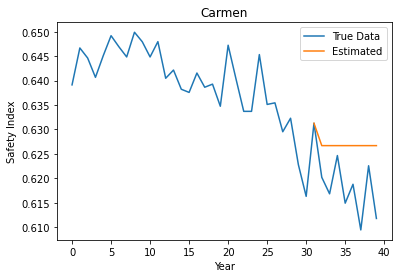

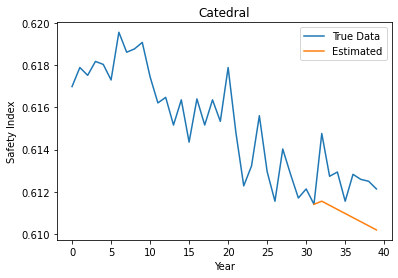

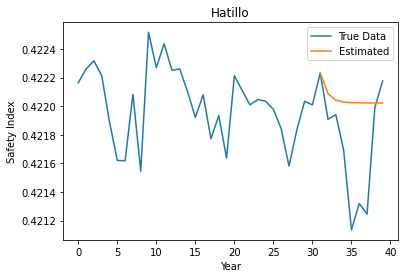

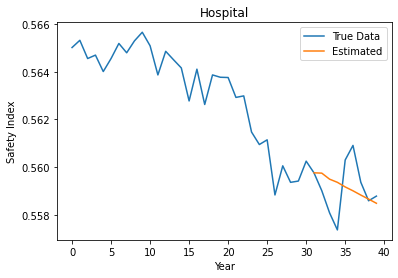

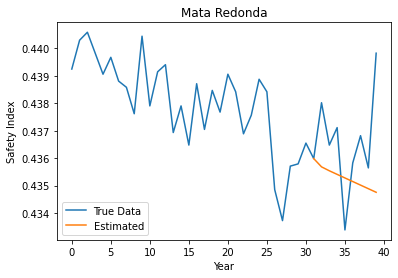

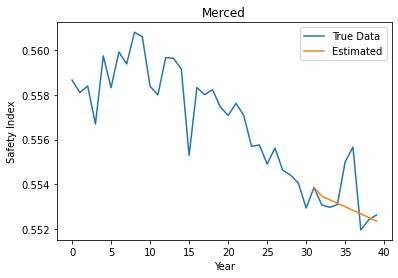

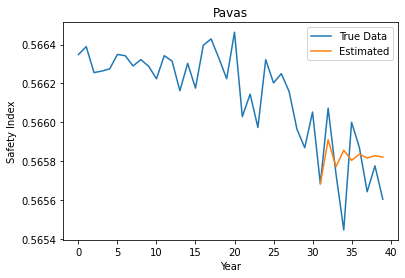

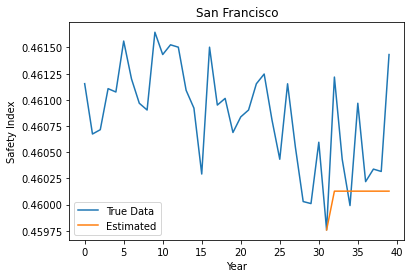

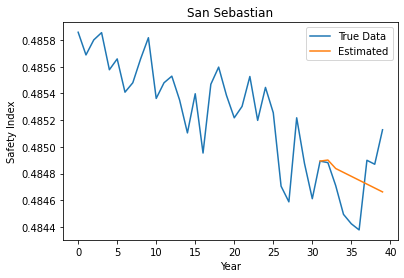

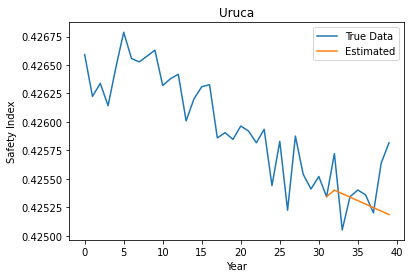

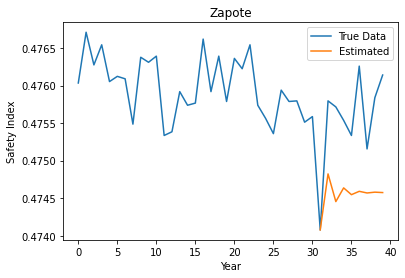

In [50]:
leg = ["True Data","Estimated"]

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,0].values)
prediction_carmen = np.insert(prediction_carmen, 0, y_carmen[-1])
plt.plot(np.arange(31, 31 + len(prediction_carmen)),prediction_carmen)
plt.title("Carmen")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,1].values)
prediction_catedral = np.insert(prediction_catedral, 0, y_catedral[-1])
plt.plot(np.arange(31, 31 + len(prediction_catedral)),prediction_catedral)
plt.title("Catedral")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,2].values)
prediction_hatillo = np.insert(prediction_hatillo, 0, y_hatillo[-1])
plt.plot(np.arange(31, 31 + len(prediction_hatillo)),prediction_hatillo)
plt.title("Hatillo")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,3].values)
prediction_hospital = np.insert(prediction_hospital, 0, y_hospital[-1])
plt.plot(np.arange(31, 31 + len(prediction_hospital)),prediction_hospital)
plt.title("Hospital")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,4].values)
prediction_mata_redonda = np.insert(prediction_mata_redonda, 0, y_mata_redonda[-1])
plt.plot(np.arange(31, 31 + len(prediction_mata_redonda)),prediction_mata_redonda)
plt.title("Mata Redonda")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,5].values)
prediction_merced = np.insert(prediction_merced, 0, y_merced[-1])
plt.plot(np.arange(31, 31 + len(prediction_merced)),prediction_merced)
plt.title("Merced")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,6].values)
prediction_pavas = np.insert(prediction_pavas, 0, y_pavas[-1])
plt.plot(np.arange(31, 31 + len(prediction_pavas)),prediction_pavas)
plt.title("Pavas")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,7].values)
prediction_san_francisco = np.insert(prediction_san_francisco, 0, y_san_francisco[-1])
plt.plot(np.arange(31, 31 + len(prediction_san_francisco)),prediction_san_francisco)
plt.title("San Francisco")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,8].values)
prediction_san_sebastian = np.insert(prediction_san_sebastian, 0, y_san_sebastian[-1])
plt.plot(np.arange(31, 31 + len(prediction_san_sebastian)),prediction_san_sebastian)
plt.title("San Sebastian")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,9].values)
prediction_uruca = np.insert(prediction_uruca, 0, y_uruca[-1])
plt.plot(np.arange(31, 31 + len(prediction_uruca)),prediction_uruca)
plt.title("Uruca")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,10].values)
prediction_zapote = np.insert(prediction_zapote, 0, y_zapote[-1])
plt.plot(np.arange(31, 31 + len(prediction_zapote)),prediction_zapote)
plt.title("Zapote")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

Linear Regression Model

In [51]:
data_predicted_lr = pd.DataFrame({'CARMEN': prediction_carmen_lr,
                                  'CATEDRAL': prediction_catedral_lr,
                                  'HATILLO': prediction_hatillo_lr,
                                  'HOSPITAL': prediction_hospital_lr,
                                  'MATA REDONDA': prediction_mata_redonda_lr,
                                  'MERCED': prediction_merced_lr,
                                  'PAVAS': prediction_pavas_lr,
                                  'SAN FRANCISCO DE DOS RIOS': prediction_san_francisco_lr,
                                  'SAN SEBASTIAN': prediction_san_sebastian_lr,
                                  'URUCA': prediction_uruca_lr,
                                  'ZAPOTE': prediction_zapote_lr})

list_datetimes_prediction = pd.date_range('2018-01-01', periods = data_predicted_lr.shape[0], freq = 'QS').astype(int) // 10**9 # TRIMESTER
list_datetimes_prediction = list_datetimes_prediction.astype(str)

map_prediction_lr = plotSafetyIndexOverTime(list_datetimes_prediction, districts_polygons, data_predicted_lr)

f = folium.Figure(width=1000, height=1000)
map_prediction_lr.add_to(f)

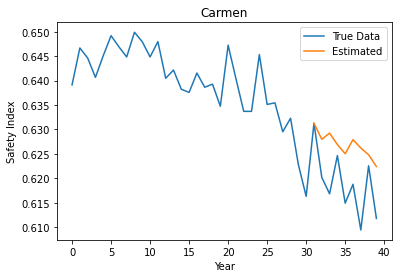

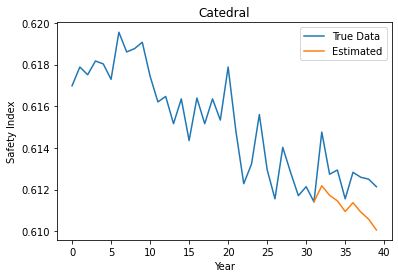

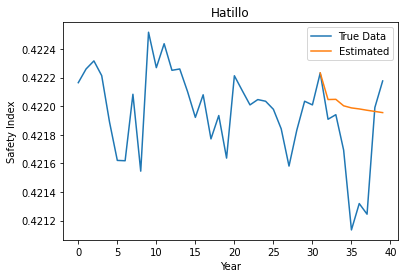

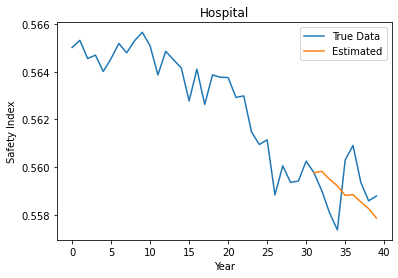

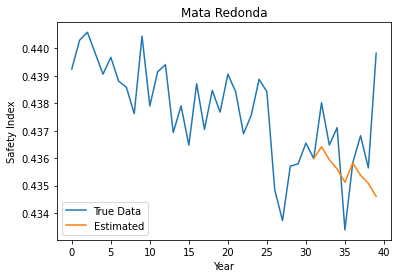

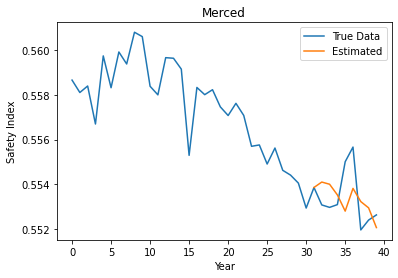

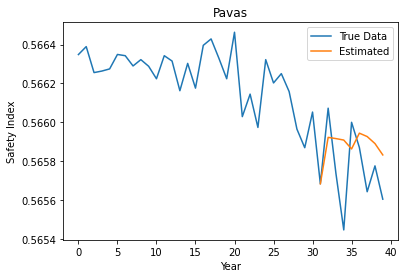

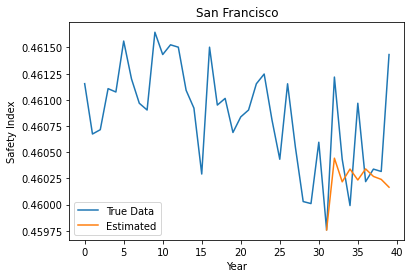

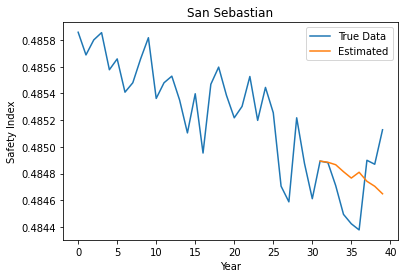

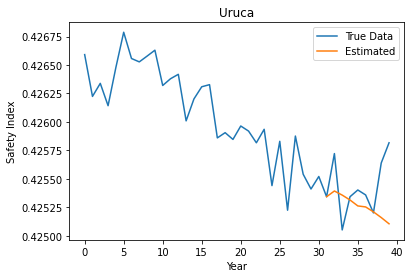

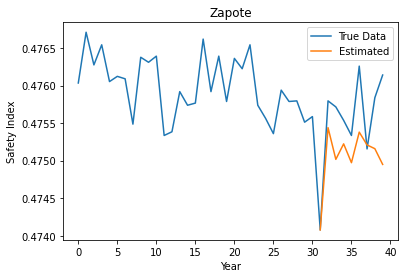

In [52]:
leg = ["True Data","Estimated"]

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,0].values)
prediction_carmen_lr = np.insert(prediction_carmen_lr, 0, y_carmen[-1])
plt.plot(np.arange(31, 31 + len(prediction_carmen_lr)),prediction_carmen_lr)
plt.title("Carmen")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,1].values)
prediction_catedral_lr = np.insert(prediction_catedral_lr, 0, y_catedral[-1])
plt.plot(np.arange(31, 31 + len(prediction_catedral_lr)),prediction_catedral_lr)
plt.title("Catedral")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,2].values)
prediction_hatillo_lr = np.insert(prediction_hatillo_lr, 0, y_hatillo[-1])
plt.plot(np.arange(31, 31 + len(prediction_hatillo_lr)),prediction_hatillo_lr)
plt.title("Hatillo")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,3].values)
prediction_hospital_lr = np.insert(prediction_hospital_lr, 0, y_hospital[-1])
plt.plot(np.arange(31, 31 + len(prediction_hospital_lr)),prediction_hospital_lr)
plt.title("Hospital")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,4].values)
prediction_mata_redonda_lr = np.insert(prediction_mata_redonda_lr, 0, y_mata_redonda[-1])
plt.plot(np.arange(31, 31 + len(prediction_mata_redonda_lr)),prediction_mata_redonda_lr)
plt.title("Mata Redonda")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,5].values)
prediction_merced_lr = np.insert(prediction_merced_lr, 0, y_merced[-1])
plt.plot(np.arange(31, 31 + len(prediction_merced_lr)),prediction_merced_lr)
plt.title("Merced")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,6].values)
prediction_pavas_lr = np.insert(prediction_pavas_lr, 0, y_pavas[-1])
plt.plot(np.arange(31, 31 + len(prediction_pavas_lr)),prediction_pavas_lr)
plt.title("Pavas")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,7].values)
prediction_san_francisco_lr = np.insert(prediction_san_francisco_lr, 0, y_san_francisco[-1])
plt.plot(np.arange(31, 31 + len(prediction_san_francisco_lr)),prediction_san_francisco_lr)
plt.title("San Francisco")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,8].values)
prediction_san_sebastian_lr = np.insert(prediction_san_sebastian_lr, 0, y_san_sebastian[-1])
plt.plot(np.arange(31, 31 + len(prediction_san_sebastian_lr)),prediction_san_sebastian_lr)
plt.title("San Sebastian")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,9].values)
prediction_uruca_lr = np.insert(prediction_uruca_lr, 0, y_uruca[-1])
plt.plot(np.arange(31, 31 + len(prediction_uruca_lr)),prediction_uruca_lr)
plt.title("Uruca")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,40),safety_index_trimester.iloc[0:40,10].values)
prediction_zapote_lr = np.insert(prediction_zapote_lr, 0, y_zapote[-1])
plt.plot(np.arange(31, 31 + len(prediction_zapote_lr)),prediction_zapote_lr)
plt.title("Zapote")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

### Predicted Safety Index (Year)

ARIMA Model

In [53]:
data_predicted = pd.DataFrame({'CARMEN': prediction_carmen_year,
                                  'CATEDRAL': prediction_catedral_year,
                                  'HATILLO': prediction_hatillo_year,
                                  'HOSPITAL': prediction_hospital_year,
                                  'MATA REDONDA': prediction_mata_redonda_year,
                                  'MERCED': prediction_merced_year,
                                  'PAVAS': prediction_pavas_year,
                                  'SAN FRANCISCO DE DOS RIOS': prediction_san_francisco_year,
                                  'SAN SEBASTIAN': prediction_san_sebastian_year,
                                  'URUCA': prediction_uruca_year,
                                  'ZAPOTE': prediction_zapote_year})

list_datetimes_prediction = pd.date_range('2018-01-01', periods = data_predicted.shape[0], freq = 'YS').astype(int) // 10**9 # Year
list_datetimes_prediction = list_datetimes_prediction.astype(str)

map_prediction_lr = plotSafetyIndexOverTime(list_datetimes_prediction, districts_polygons, data_predicted)

f = folium.Figure(width=1000, height=1000)
map_prediction_lr.add_to(f)

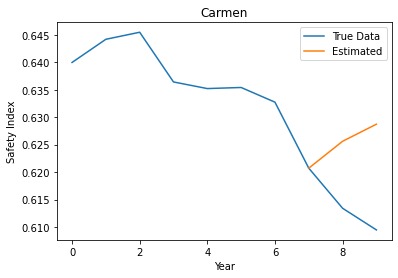

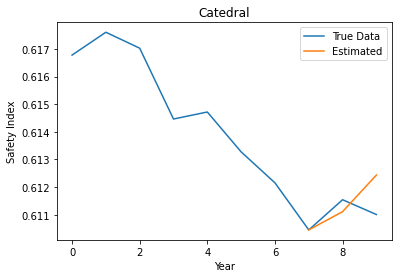

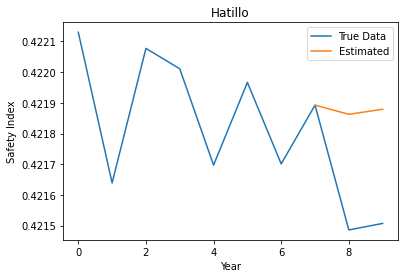

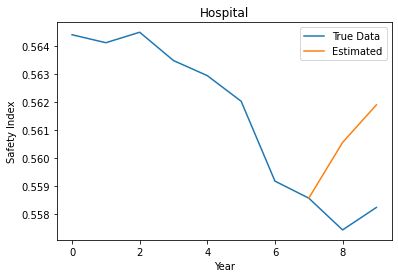

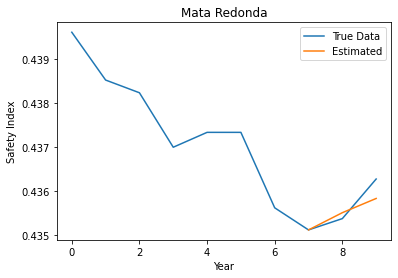

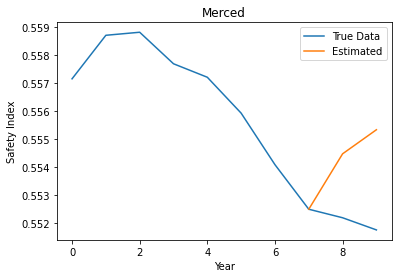

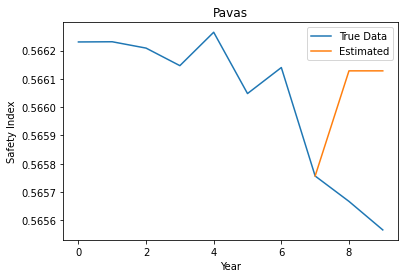

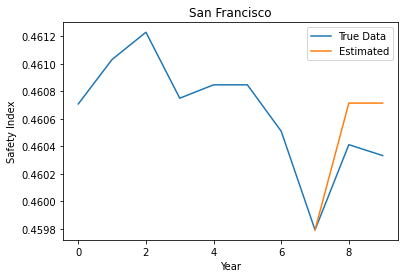

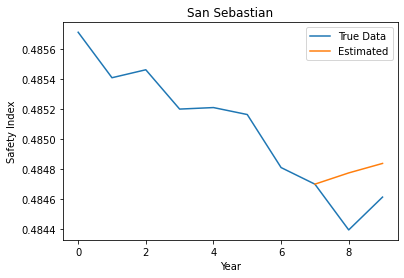

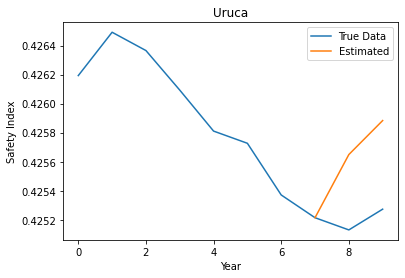

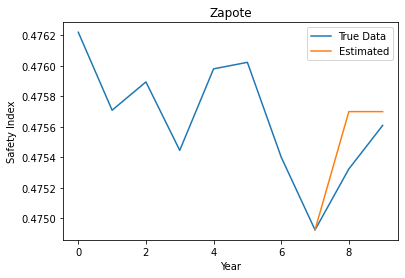

In [54]:
leg = ["True Data","Estimated"]

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,0].values)
prediction_carmen_year = np.insert(prediction_carmen_year, 0, y_carmen_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_carmen_year)),prediction_carmen_year)
plt.title("Carmen")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,1].values)
prediction_catedral_year = np.insert(prediction_catedral_year, 0, y_catedral_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_catedral_year)),prediction_catedral_year)
plt.title("Catedral")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,2].values)
prediction_hatillo_year = np.insert(prediction_hatillo_year, 0, y_hatillo_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_hatillo_year)),prediction_hatillo_year)
plt.title("Hatillo")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,3].values)
prediction_hospital_year = np.insert(prediction_hospital_year, 0, y_hospital_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_hospital_year)),prediction_hospital_year)
plt.title("Hospital")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,4].values)
prediction_mata_redonda_year = np.insert(prediction_mata_redonda_year, 0, y_mata_redonda_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_mata_redonda_year)),prediction_mata_redonda_year)
plt.title("Mata Redonda")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,5].values)
prediction_merced_year = np.insert(prediction_merced_year, 0, y_merced_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_merced_year)),prediction_merced_year)
plt.title("Merced")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,6].values)
prediction_pavas_year = np.insert(prediction_pavas_year, 0, y_pavas_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_pavas_year)),prediction_pavas_year)
plt.title("Pavas")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,7].values)
prediction_san_francisco_year = np.insert(prediction_san_francisco_year, 0, y_san_francisco_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_san_francisco_year)),prediction_san_francisco_year)
plt.title("San Francisco")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,8].values)
prediction_san_sebastian_year = np.insert(prediction_san_sebastian_year, 0, y_san_sebastian_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_san_sebastian_year)),prediction_san_sebastian_year)
plt.title("San Sebastian")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,9].values)
prediction_uruca_year = np.insert(prediction_uruca_year, 0, y_uruca_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_uruca_year)),prediction_uruca_year)
plt.title("Uruca")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,10].values)
prediction_zapote_year = np.insert(prediction_zapote_year, 0, y_zapote_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_zapote_year)),prediction_zapote_year)
plt.title("Zapote")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

Linear Regression Model

In [55]:
data_predicted_lr = pd.DataFrame({'CARMEN': prediction_carmen_lr_year,
                                  'CATEDRAL': prediction_catedral_lr_year,
                                  'HATILLO': prediction_hatillo_lr_year,
                                  'HOSPITAL': prediction_hospital_lr_year,
                                  'MATA REDONDA': prediction_mata_redonda_lr_year,
                                  'MERCED': prediction_merced_lr_year,
                                  'PAVAS': prediction_pavas_lr_year,
                                  'SAN FRANCISCO DE DOS RIOS': prediction_san_francisco_lr_year,
                                  'SAN SEBASTIAN': prediction_san_sebastian_lr_year,
                                  'URUCA': prediction_uruca_lr_year,
                                  'ZAPOTE': prediction_zapote_lr_year})

list_datetimes_prediction = pd.date_range('2018-01-01', periods = data_predicted.shape[0], freq = 'YS').astype(int) // 10**9 # Year
list_datetimes_prediction = list_datetimes_prediction.astype(str)

map_prediction_lr = plotSafetyIndexOverTime(list_datetimes_prediction, districts_polygons, data_predicted)

f = folium.Figure(width=1000, height=1000)
map_prediction_lr.add_to(f)

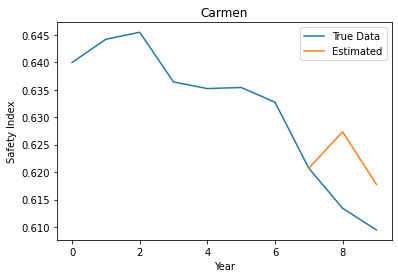

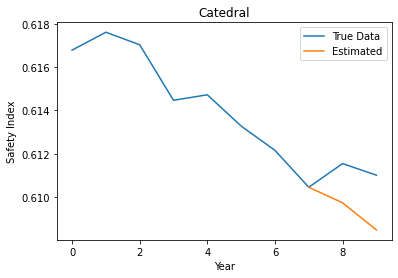

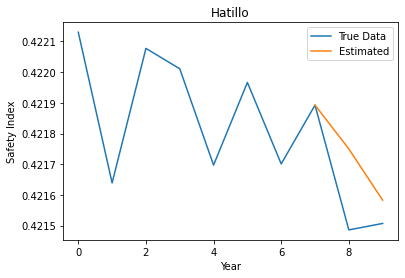

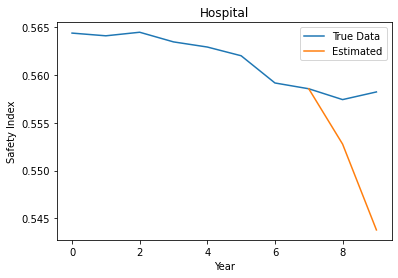

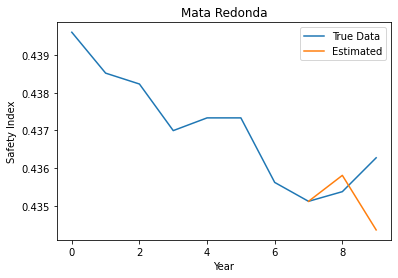

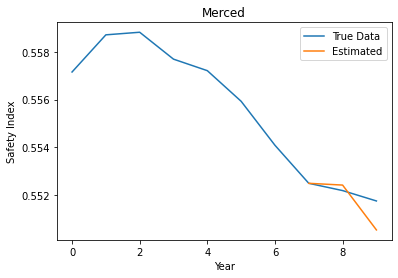

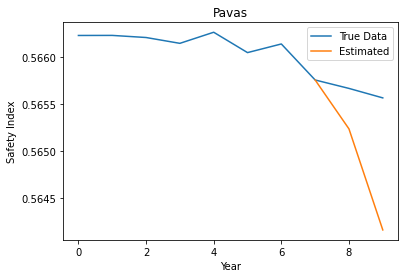

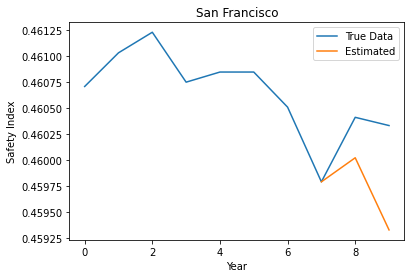

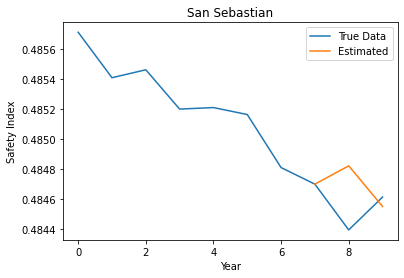

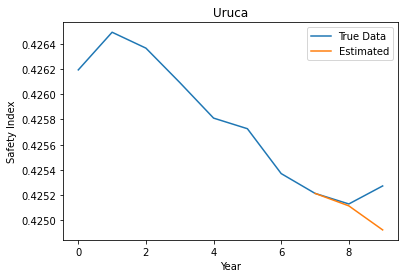

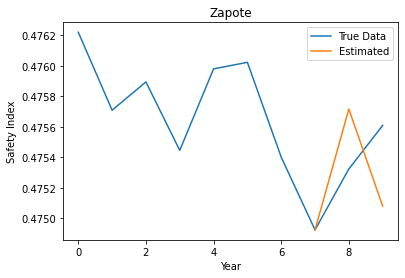

In [56]:
leg = ["True Data","Estimated"]

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,0].values)
prediction_carmen_lr_year = np.insert(prediction_carmen_lr_year, 0, y_carmen_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_carmen_lr_year)),prediction_carmen_lr_year)
plt.title("Carmen")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,1].values)
prediction_catedral_lr_year = np.insert(prediction_catedral_lr_year, 0, y_catedral_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_catedral_lr_year)),prediction_catedral_lr_year)
plt.title("Catedral")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,2].values)
prediction_hatillo_lr_year = np.insert(prediction_hatillo_lr_year, 0, y_hatillo_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_hatillo_lr_year)),prediction_hatillo_lr_year)
plt.title("Hatillo")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,3].values)
prediction_hospital_lr_year = np.insert(prediction_hospital_lr_year, 0, y_hospital_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_hospital_lr_year)),prediction_hospital_lr_year)
plt.title("Hospital")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,4].values)
prediction_mata_redonda_lr_year = np.insert(prediction_mata_redonda_lr_year, 0, y_mata_redonda_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_mata_redonda_lr_year)),prediction_mata_redonda_lr_year)
plt.title("Mata Redonda")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,5].values)
prediction_merced_lr_year = np.insert(prediction_merced_lr_year, 0, y_merced_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_merced_lr_year)),prediction_merced_lr_year)
plt.title("Merced")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,6].values)
prediction_pavas_lr_year = np.insert(prediction_pavas_lr_year, 0, y_pavas_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_pavas_lr_year)),prediction_pavas_lr_year)
plt.title("Pavas")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,7].values)
prediction_san_francisco_lr_year = np.insert(prediction_san_francisco_lr_year, 0, y_san_francisco_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_san_francisco_lr_year)),prediction_san_francisco_lr_year)
plt.title("San Francisco")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,8].values)
prediction_san_sebastian_lr_year = np.insert(prediction_san_sebastian_lr_year, 0, y_san_sebastian_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_san_sebastian_lr_year)),prediction_san_sebastian_lr_year)
plt.title("San Sebastian")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,9].values)
prediction_uruca_lr_year = np.insert(prediction_uruca_lr_year, 0, y_uruca_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_uruca_lr_year)),prediction_uruca_lr_year)
plt.title("Uruca")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

plt.figure()
plt.plot(np.arange(0,10),safety_index_year.iloc[0:10,10].values)
prediction_zapote_lr_year = np.insert(prediction_zapote_lr_year, 0, y_zapote_year[-1])
plt.plot(np.arange(7, 7 + len(prediction_zapote_lr_year)),prediction_zapote_lr_year)
plt.title("Zapote")
plt.xlabel('Year')
plt.ylabel('Safety Index')
plt.legend(leg)

## 👓 References

[1] https://www.wikidata.org/wiki/Q2536213

[2] https://safecities.economist.com/safe-cities-2021-whitepaper/

[3] https://asiafoundation.org/publication/guidelines-for-an-index-on-gender-friendly-cities/

[4] https://reliefweb.int/report/world/women-peace-and-security-index-202021-tracking-sustainable-peace-through-inclusion

[5] https://www.valuepenguin.com/safest-cities-women?fbclid=IwAR0yPt_QBF4zSFkuWaIHfDioEHN2rvXLa1rJTDFR2tvToUVaP_HYQJkQPVE

## ⏭️ Appendix


Demographic data of the districts of San Jose canton

In [57]:
# Citizen participation: National elections
display(san_jose_district_dataset[['Participación electoral','Province','Canton','District']].sort_values('Participación electoral', ascending=False))

# Health: Low weight in children, Mortality in children with less than 5 years old, Coverage of drinking water, births in single moms younger than 19 years old
display(san_jose_district_dataset[['Salud','Province','Canton','District']].sort_values('Salud', ascending=False))

# Education: Infrastruture in education, Special educational programmes, non-single teach schools, educational lag, high school coverage
display(san_jose_district_dataset[['Educación','Province','Canton','District']].sort_values('Educación', ascending=False))

# Security: Deaths in traffic accidents, intentional homicide
display(san_jose_district_dataset[['Seguridad','Province','Canton','District']].sort_values('Seguridad', ascending=False))

# Social Development Index calculated by the Ministry of Planing and Economic Policy of Costa Rica. It uses Education, Citizen participation, Health, Security, and Economy
display(san_jose_district_dataset[['IDS 2017','Province','Canton','District']].sort_values('IDS 2017', ascending=False))

# Population Census 2011
display(san_jose_district_dataset[['Población total','Province','Canton','District']].sort_values('Población total', ascending=False))

# Population density Census 2011
display(san_jose_district_dataset[['Densidad de población','Province','Canton','District']].sort_values('Densidad de población', ascending=False))

# Ratio men to women Census 2011
display(san_jose_district_dataset[['Relación hombres mujeres','Province','Canton','District']].sort_values('Relación hombres mujeres', ascending=False))

# Ratio active to inactive population Census 2011
display(san_jose_district_dataset[['Relación dependencia demográfica','Province','Canton','District']].sort_values('Relación dependencia demográfica', ascending=False))

# Percentage of people with more than 65 years old Census 2011
display(san_jose_district_dataset[['Porcentaje de población de 65 años y más','Province','Canton','District']].sort_values('Porcentaje de población de 65 años y más', ascending=False))

# Percentage of people born abroad Census 2011
display(san_jose_district_dataset[['Porcentaje de población nacida en el extranjero','Province','Canton','District']].sort_values('Porcentaje de población nacida en el extranjero', ascending=False))

# Percentage of people in union or married Census 2011
display(san_jose_district_dataset[['Porcentaje de personas unidas o casadas','Province','Canton','District']].sort_values('Porcentaje de personas unidas o casadas', ascending=False))

# Percentage of handicaped people Census 2011
display(san_jose_district_dataset[['Porcentaje de discapacidad','Province','Canton','District']].sort_values('Porcentaje de discapacidad', ascending=False))

# Percentage of people without social security Census 2011
display(san_jose_district_dataset[['Porcentaje de población no asegurada','Province','Canton','District']].sort_values('Porcentaje de población no asegurada', ascending=False))

Participación electoral  Province    Canton                   District
5                     51.82  SAN JOSE  SAN JOSE  SAN FRANCISCO DE DOS RIOS
7                     49.94  SAN JOSE  SAN JOSE               MATA REDONDA
4                     49.73  SAN JOSE  SAN JOSE                     ZAPOTE
3                     43.00  SAN JOSE  SAN JOSE                   CATEDRAL
10                    42.80  SAN JOSE  SAN JOSE              SAN SEBASTIAN
0                     41.11  SAN JOSE  SAN JOSE                     CARMEN
9                     39.99  SAN JOSE  SAN JOSE                    HATILLO
1                     39.93  SAN JOSE  SAN JOSE                     MERCED
6                     39.80  SAN JOSE  SAN JOSE                      URUCA
8                     39.71  SAN JOSE  SAN JOSE                      PAVAS
2                     36.12  SAN JOSE  SAN JOSE                   HOSPITAL

Salud  Province    Canton                   District
7   91.35  SAN JOSE  SAN JOSE               MATA REDONDA
3   83.26  SAN JOSE  SAN JOSE                   CATEDRAL
8   83.23  SAN JOSE  SAN JOSE                      PAVAS
4   82.95  SAN JOSE  SAN JOSE                     ZAPOTE
10  82.77  SAN JOSE  SAN JOSE              SAN SEBASTIAN
5   82.56  SAN JOSE  SAN JOSE  SAN FRANCISCO DE DOS RIOS
0   78.15  SAN JOSE  SAN JOSE                     CARMEN
1   76.35  SAN JOSE  SAN JOSE                     MERCED
2   74.53  SAN JOSE  SAN JOSE                   HOSPITAL
6   73.96  SAN JOSE  SAN JOSE                      URUCA
9   72.17  SAN JOSE  SAN JOSE                    HATILLO

Educación  Province    Canton                   District
0       90.67  SAN JOSE  SAN JOSE                     CARMEN
7       74.56  SAN JOSE  SAN JOSE               MATA REDONDA
3       73.79  SAN JOSE  SAN JOSE                   CATEDRAL
10      73.68  SAN JOSE  SAN JOSE              SAN SEBASTIAN
4       73.15  SAN JOSE  SAN JOSE                     ZAPOTE
1       68.90  SAN JOSE  SAN JOSE                     MERCED
9       66.98  SAN JOSE  SAN JOSE                    HATILLO
5       64.52  SAN JOSE  SAN JOSE  SAN FRANCISCO DE DOS RIOS
2       63.08  SAN JOSE  SAN JOSE                   HOSPITAL
8       62.57  SAN JOSE  SAN JOSE                      PAVAS
6       58.98  SAN JOSE  SAN JOSE                      URUCA

Seguridad  Province    Canton                   District
5       92.20  SAN JOSE  SAN JOSE  SAN FRANCISCO DE DOS RIOS
4       91.90  SAN JOSE  SAN JOSE                     ZAPOTE
8       90.07  SAN JOSE  SAN JOSE                      PAVAS
9       90.06  SAN JOSE  SAN JOSE                    HATILLO
10      87.39  SAN JOSE  SAN JOSE              SAN SEBASTIAN
7       85.89  SAN JOSE  SAN JOSE               MATA REDONDA
6       85.07  SAN JOSE  SAN JOSE                      URUCA
3       84.17  SAN JOSE  SAN JOSE                   CATEDRAL
1       76.23  SAN JOSE  SAN JOSE                     MERCED
2       70.54  SAN JOSE  SAN JOSE                   HOSPITAL
0       36.94  SAN JOSE  SAN JOSE                     CARMEN

IDS 2017  Province    Canton                   District
7      93.16  SAN JOSE  SAN JOSE               MATA REDONDA
5      82.87  SAN JOSE  SAN JOSE  SAN FRANCISCO DE DOS RIOS
4      82.86  SAN JOSE  SAN JOSE                     ZAPOTE
0      81.16  SAN JOSE  SAN JOSE                     CARMEN
10     76.19  SAN JOSE  SAN JOSE              SAN SEBASTIAN
3      76.17  SAN JOSE  SAN JOSE                   CATEDRAL
8      73.72  SAN JOSE  SAN JOSE                      PAVAS
9      68.71  SAN JOSE  SAN JOSE                    HATILLO
1      67.73  SAN JOSE  SAN JOSE                     MERCED
6      63.87  SAN JOSE  SAN JOSE                      URUCA
2      62.50  SAN JOSE  SAN JOSE                   HOSPITAL

Población total  Province    Canton                   District
8           71384.0  SAN JOSE  SAN JOSE                      PAVAS
9           50511.0  SAN JOSE  SAN JOSE                    HATILLO
10          40065.0  SAN JOSE  SAN JOSE              SAN SEBASTIAN
6           31728.0  SAN JOSE  SAN JOSE                      URUCA
5           20209.0  SAN JOSE  SAN JOSE  SAN FRANCISCO DE DOS RIOS
2           19270.0  SAN JOSE  SAN JOSE                   HOSPITAL
4           18679.0  SAN JOSE  SAN JOSE                     ZAPOTE
3           12936.0  SAN JOSE  SAN JOSE                   CATEDRAL
1           12257.0  SAN JOSE  SAN JOSE                     MERCED
7            8313.0  SAN JOSE  SAN JOSE               MATA REDONDA
0            2702.0  SAN JOSE  SAN JOSE                     CARMEN

Densidad de población  Province    Canton                   District
9            11829.274005  SAN JOSE  SAN JOSE                    HATILLO
10           10066.582915  SAN JOSE  SAN JOSE              SAN SEBASTIAN
8             7642.826552  SAN JOSE  SAN JOSE                      PAVAS
5             7540.671642  SAN JOSE  SAN JOSE  SAN FRANCISCO DE DOS RIOS
4             6554.035088  SAN JOSE  SAN JOSE                     ZAPOTE
2             5701.183432  SAN JOSE  SAN JOSE                   HOSPITAL
3             5600.000000  SAN JOSE  SAN JOSE                   CATEDRAL
1             5352.401747  SAN JOSE  SAN JOSE                     MERCED
6             3799.760479  SAN JOSE  SAN JOSE                      URUCA
7             2258.967391  SAN JOSE  SAN JOSE               MATA REDONDA
0             1813.422819  SAN JOSE  SAN JOSE                     CARMEN

Relación hombres mujeres  Province    Canton                   District
2                  94.528569  SAN JOSE  SAN JOSE                   HOSPITAL
6                  93.063162  SAN JOSE  SAN JOSE                      URUCA
1                  92.387380  SAN JOSE  SAN JOSE                     MERCED
10                 90.758463  SAN JOSE  SAN JOSE              SAN SEBASTIAN
8                  90.326881  SAN JOSE  SAN JOSE                      PAVAS
3                  89.233470  SAN JOSE  SAN JOSE                   CATEDRAL
9                  88.783824  SAN JOSE  SAN JOSE                    HATILLO
5                  87.571932  SAN JOSE  SAN JOSE  SAN FRANCISCO DE DOS RIOS
4                  86.995695  SAN JOSE  SAN JOSE                     ZAPOTE
7                  81.229562  SAN JOSE  SAN JOSE               MATA REDONDA
0                  77.646285  SAN JOSE  SAN JOSE                     CARMEN

Relación dependencia demográfica  Province    Canton  \
6                          51.121696  SAN JOSE  SAN JOSE   
2                          47.132931  SAN JOSE  SAN JOSE   
0                          46.927678  SAN JOSE  SAN JOSE   
9                          46.783099  SAN JOSE  SAN JOSE   
3                          45.774172  SAN JOSE  SAN JOSE   
8                          45.750046  SAN JOSE  SAN JOSE   
7                          45.586690  SAN JOSE  SAN JOSE   
1                          45.345666  SAN JOSE  SAN JOSE   
4                          44.283949  SAN JOSE  SAN JOSE   
10                         43.186448  SAN JOSE  SAN JOSE   
5                          40.135913  SAN JOSE  SAN JOSE   

                     District  
6                       URUCA  
2                    HOSPITAL  
0                      CARMEN  
9                     HATILLO  
3                    CATEDRAL  
8                       PAVAS  
7                MATA REDONDA  
1                      MERCED  
4                      ZAPOTE  
10              SAN SEBASTIAN  
5   SAN FRANCISCO DE DOS RIOS

Porcentaje de población de 65 años y más  Province    Canton  \
0                                  21.909697  SAN JOSE  SAN JOSE   
7                                  16.444124  SAN JOSE  SAN JOSE   
3                                  14.440322  SAN JOSE  SAN JOSE   
4                                  13.914021  SAN JOSE  SAN JOSE   
5                                  12.242070  SAN JOSE  SAN JOSE   
2                                  10.373638  SAN JOSE  SAN JOSE   
9                                  10.181941  SAN JOSE  SAN JOSE   
1                                   9.969813  SAN JOSE  SAN JOSE   
10                                  9.115188  SAN JOSE  SAN JOSE   
8                                   7.751037  SAN JOSE  SAN JOSE   
6                                   5.427383  SAN JOSE  SAN JOSE   

                     District  
0                      CARMEN  
7                MATA REDONDA  
3                    CATEDRAL  
4                      ZAPOTE  
5   SAN FRANCISCO DE DOS RIOS  
2                    HOSPITAL  
9                     HATILLO  
1                      MERCED  
10              SAN SEBASTIAN  
8                       PAVAS  
6                       URUCA

Porcentaje de población nacida en el extranjero  Province    Canton  \
6                                         33.320726  SAN JOSE  SAN JOSE   
1                                         27.763727  SAN JOSE  SAN JOSE   
0                                         24.537380  SAN JOSE  SAN JOSE   
7                                         22.374594  SAN JOSE  SAN JOSE   
3                                         20.338590  SAN JOSE  SAN JOSE   
2                                         20.249092  SAN JOSE  SAN JOSE   
8                                         16.336994  SAN JOSE  SAN JOSE   
10                                        12.479720  SAN JOSE  SAN JOSE   
5                                         10.401306  SAN JOSE  SAN JOSE   
4                                          9.508004  SAN JOSE  SAN JOSE   
9                                          6.505514  SAN JOSE  SAN JOSE   

                     District  
6                       URUCA  
1                      MERCED  
0                      CARMEN  
7                MATA REDONDA  
3                    CATEDRAL  
2                    HOSPITAL  
8                       PAVAS  
10              SAN SEBASTIAN  
5   SAN FRANCISCO DE DOS RIOS  
4                      ZAPOTE  
9                     HATILLO

Porcentaje de personas unidas o casadas  Province    Canton  \
6                                 51.204307  SAN JOSE  SAN JOSE   
8                                 47.673736  SAN JOSE  SAN JOSE   
1                                 45.705552  SAN JOSE  SAN JOSE   
10                                45.268512  SAN JOSE  SAN JOSE   
5                                 44.940949  SAN JOSE  SAN JOSE   
2                                 44.264355  SAN JOSE  SAN JOSE   
7                                 43.330606  SAN JOSE  SAN JOSE   
9                                 42.773424  SAN JOSE  SAN JOSE   
4                                 41.947956  SAN JOSE  SAN JOSE   
3                                 40.436915  SAN JOSE  SAN JOSE   
0                                 36.151369  SAN JOSE  SAN JOSE   

                     District  
6                       URUCA  
8                       PAVAS  
1                      MERCED  
10              SAN SEBASTIAN  
5   SAN FRANCISCO DE DOS RIOS  
2                    HOSPITAL  
7                MATA REDONDA  
9                     HATILLO  
4                      ZAPOTE  
3                    CATEDRAL  
0                      CARMEN

Porcentaje de discapacidad  Province    Canton                   District
0                    15.692080  SAN JOSE  SAN JOSE                     CARMEN
2                    15.474831  SAN JOSE  SAN JOSE                   HOSPITAL
9                    14.913583  SAN JOSE  SAN JOSE                    HATILLO
3                    12.755102  SAN JOSE  SAN JOSE                   CATEDRAL
8                    11.925642  SAN JOSE  SAN JOSE                      PAVAS
7                    11.776735  SAN JOSE  SAN JOSE               MATA REDONDA
4                    11.547727  SAN JOSE  SAN JOSE                     ZAPOTE
1                    11.405727  SAN JOSE  SAN JOSE                     MERCED
6                    11.135275  SAN JOSE  SAN JOSE                      URUCA
10                   10.989642  SAN JOSE  SAN JOSE              SAN SEBASTIAN
5                     9.886684  SAN JOSE  SAN JOSE  SAN FRANCISCO DE DOS RIOS

Porcentaje de población no asegurada  Province    Canton  \
6                              20.798664  SAN JOSE  SAN JOSE   
2                              18.593669  SAN JOSE  SAN JOSE   
1                              18.103941  SAN JOSE  SAN JOSE   
8                              14.486440  SAN JOSE  SAN JOSE   
3                              14.169759  SAN JOSE  SAN JOSE   
0                              13.286454  SAN JOSE  SAN JOSE   
10                             12.432298  SAN JOSE  SAN JOSE   
9                              12.290392  SAN JOSE  SAN JOSE   
7                              11.704559  SAN JOSE  SAN JOSE   
4                              10.027303  SAN JOSE  SAN JOSE   
5                               9.683804  SAN JOSE  SAN JOSE   

                     District  
6                       URUCA  
2                    HOSPITAL  
1                      MERCED  
8                       PAVAS  
3                    CATEDRAL  
0                      CARMEN  
10              SAN SEBASTIAN  
9                     HATILLO  
7                MATA REDONDA  
4                      ZAPOTE  
5   SAN FRANCISCO DE DOS RIOS

Indexes used to build safety index

In [58]:
san_jose_districts_subtypes_count_trimester_normalised.groupby('Trimester').sum()

CARMEN  CATEDRAL   HATILLO  HOSPITAL  MATA REDONDA    MERCED  \
Trimester                                                                   
1.0        0.000299  0.000087  0.000011  0.000043      0.000045  0.000065   
2.0        0.000212  0.000076  0.000010  0.000040      0.000032  0.000072   
3.0        0.000236  0.000081  0.000009  0.000048      0.000029  0.000068   
4.0        0.000282  0.000073  0.000010  0.000047      0.000038  0.000088   
5.0        0.000230  0.000075  0.000014  0.000055      0.000047  0.000053   
6.0        0.000183  0.000083  0.000017  0.000048      0.000040  0.000069   
7.0        0.000209  0.000057  0.000017  0.000041      0.000050  0.000051   
8.0        0.000233  0.000068  0.000012  0.000046      0.000052  0.000057   
9.0        0.000175  0.000066  0.000018  0.000040      0.000063  0.000040   
10.0       0.000197  0.000063  0.000007  0.000036      0.000031  0.000043   
11.0       0.000233  0.000082  0.000010  0.000042      0.000060  0.000068   
12.0       0.000197  0.000096  0.000008  0.000056      0.000046  0.000073   
13.0       0.000284  0.000093  0.000010  0.000045      0.000043  0.000053   
14.0       0.000264  0.000108  0.000010  0.000049      0.000071  0.000054   
15.0       0.000310  0.000094  0.000012  0.000053      0.000060  0.000059   
16.0       0.000317  0.000117  0.000014  0.000069      0.000077  0.000104   
17.0       0.000271  0.000094  0.000012  0.000054      0.000051  0.000069   
18.0       0.000305  0.000108  0.000015  0.000071      0.000070  0.000073   
19.0       0.000298  0.000094  0.000014  0.000056      0.000054  0.000070   
20.0       0.000350  0.000106  0.000017  0.000058      0.000063  0.000079   
21.0       0.000206  0.000076  0.000010  0.000058      0.000047  0.000083   
22.0       0.000285  0.000112  0.000012  0.000067      0.000054  0.000077   
23.0       0.000362  0.000141  0.000013  0.000067      0.000072  0.000083   
24.0       0.000362  0.000130  0.000012  0.000084      0.000064  0.000099   
25.0       0.000228  0.000103  0.000012  0.000090      0.000049  0.000099   
26.0       0.000346  0.000133  0.000013  0.000088      0.000054  0.000108   
27.0       0.000342  0.000150  0.000015  0.000115      0.000095  0.000100   
28.0       0.000410  0.000121  0.000018  0.000100      0.000109  0.000112   
29.0       0.000378  0.000135  0.000015  0.000108      0.000086  0.000114   
30.0       0.000488  0.000148  0.000012  0.000108      0.000085  0.000118   
31.0       0.000563  0.000143  0.000013  0.000098      0.000076  0.000131   
32.0       0.000390  0.000151  0.000010  0.000104      0.000082  0.000121   
33.0       0.000518  0.000113  0.000014  0.000112      0.000059  0.000130   
34.0       0.000557  0.000136  0.000013  0.000123      0.000077  0.000131   
35.0       0.000467  0.000134  0.000016  0.000131      0.000069  0.000129   
36.0       0.000579  0.000150  0.000023  0.000098      0.000112  0.000107   
37.0       0.000535  0.000135  0.000021  0.000091      0.000084  0.000100   
38.0       0.000643  0.000138  0.000022  0.000108      0.000073  0.000143   
39.0       0.000491  0.000139  0.000013  0.000117      0.000086  0.000137   
40.0       0.000615  0.000143  0.000011  0.000115      0.000038  0.000135   
41.0       0.000456  0.000102  0.000011  0.000094      0.000042  0.000132   
42.0       0.000163  0.000050  0.000006  0.000060      0.000021  0.000060   
43.0       0.000146  0.000059  0.000007  0.000064      0.000020  0.000084   
44.0       0.000167  0.000049  0.000007  0.000087      0.000022  0.000088   
45.0       0.000193  0.000051  0.000008  0.000067      0.000037  0.000071   
46.0       0.000183  0.000054  0.000007  0.000067      0.000019  0.000088   
47.0       0.000240  0.000067  0.000008  0.000063      0.000022  0.000117   
48.0       0.000209  0.000073  0.000010  0.000058      0.000046  0.000088   
49.0       0.000191  0.000073  0.000008  0.000063      0.000034  0.000069   
50.0       0.000238  0.000050  0.000007  0.000067      0.000017  0.000058   

        

In [59]:
# Year
display(pd.DataFrame(security_index_year,columns=san_jose_districts))

CARMEN  CATEDRAL   HATILLO  HOSPITAL MATA REDONDA    MERCED     PAVAS  \
0   0.374436  0.739057  0.651118   0.66436     0.654267  0.866257  0.683479   
1   0.399765  0.744016  0.648173  0.662653     0.647762    0.8756  0.683483   
2   0.407462  0.740553  0.650802  0.664894      0.64603  0.876253  0.683348   
3   0.353114  0.725178  0.650404  0.658831     0.638617  0.869488  0.682976   
4   0.345887  0.726703  0.648522  0.655596     0.640641  0.866595  0.683684   
5   0.347071  0.718046  0.650137  0.650117     0.640641  0.858894  0.682385   
6   0.331024  0.711323  0.648545  0.633006     0.630373  0.847837  0.682936   
7   0.258853  0.701103  0.649694  0.629362     0.627363  0.838272  0.680637   
8   0.215041  0.707658  0.647255  0.622555     0.628903  0.836445  0.680099   
9   0.191358  0.704443  0.647382   0.62737     0.634291  0.833835  0.679494   
10  0.388581   0.74729  0.652348  0.645765     0.659758  0.855847  0.682677   
11  0.404103  0.749534  0.652284  0.653299     0.657041  0.855847  0.682429   
12  0.409296  0.744565  0.652152  0.653313     0.656868  0.869699  0.684766   

   SAN FRANCISCO DE DOS RIOS SAN SEBASTIAN     URUCA    ZAPOTE  
0                   0.783553      0.953324  0.646542   0.77268  
1                   0.785495      0.951498  0.648332  0.769612  
2                   0.786682      0.951818  0.647576  0.770725  
3                   0.783803      0.950239  0.645942  0.768033  
4                   0.784386        0.9503  0.644248  0.771239  
5                   0.784386      0.950021  0.643744  0.771496  
6                   0.782362      0.947892  0.641609  0.767767  
7                   0.778053      0.947226  0.640668  0.764902  
8                   0.781774      0.945389  0.640164    0.7673  
9                   0.781299      0.946707  0.641021  0.769013  
10                  0.788692      0.952411  0.644527  0.773483  
11                  0.789011      0.952411  0.647679  0.775124  
12                  0.789549       0.95259  0.645128  0.777307